# Advanced Regression Techniques

# 

## Import necessary libraries

In [1]:
# generic libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for statistical models
from scipy import stats

# for scaling feature fluctuations
from sklearn.preprocessing import StandardScaler

# for label encoding the categorical features
from sklearn.preprocessing import LabelEncoder

# for OLS, VIF and R-Square Calculation
import statsmodels.api as sm

# for multicolinearity check
from sklearn.decomposition import PCA

# for train test split data
from sklearn.model_selection import train_test_split

# import regreassion models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

# import regression metrics libraries
from sklearn import metrics

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Import training data and check the brief description of it

In [2]:
raw_data = pd.read_csv('train.csv')

In [3]:
raw_data.shape

(1460, 81)

In [4]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing Values and Possible conclusions

In [7]:
raw_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

LotFrontage has 0.1774 % missing values
Alley has 0.9377 % missing values
MasVnrType has 0.0055 % missing values
MasVnrArea has 0.0055 % missing values
BsmtQual has 0.0253 % missing values
BsmtCond has 0.0253 % missing values
BsmtExposure has 0.026 % missing values
BsmtFinType1 has 0.0253 % missing values
BsmtFinType2 has 0.026 % missing values
FireplaceQu has 0.4726 % missing values
GarageType has 0.0555 % missing values
GarageYrBlt has 0.0555 % missing values
GarageFinish has 0.0555 % missing values
GarageQual has 0.0555 % missing values
GarageCond has 0.0555 % missing values
PoolQC has 0.9952 % missing values
Fence has 0.8075 % missing values
MiscFeature has 0.963 % missing values

18 columns has missing values


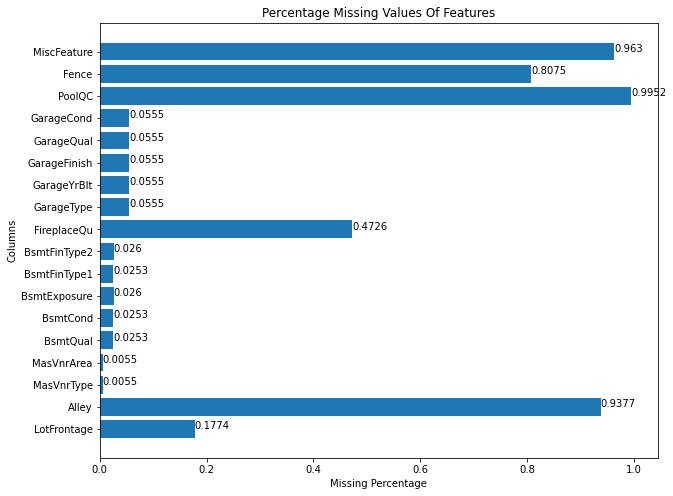

In [8]:
# making list of columns
columns = raw_data.columns.values.tolist()

# data structure initialization
missing_columns = []
missing_percent = []
column_count = 0

# missing value determination
for column_names in columns:
    if raw_data[column_names].isnull().sum() > 1:
        calculate_percentage = np.round(raw_data[column_names].isnull().mean(), 4)
        missing_percent.append(calculate_percentage)
        missing_columns.append(column_names)
        print(column_names, 'has', calculate_percentage, '% missing values')
        column_count+=1

# printing cumulative missing value count
print('\n{a} columns has missing values'.format(a=column_count))

# plotting cumulative missing value count
plt.figure(figsize=(10,8))
plt.barh(missing_columns, missing_percent)
for index, value in enumerate(missing_percent):
    plt.text(value, index, str(value))
plt.ylabel('Columns')
plt.xlabel('Missing Percentage')
plt.title('Percentage Missing Values Of Features')
plt.show()

## Splitting the data between Numeric and Categorical Features

In [9]:
raw_data_numeric = raw_data.select_dtypes(exclude=['object'])
raw_data_categorical = raw_data.select_dtypes(include=['object'])

In [10]:
raw_data_numeric.shape

(1460, 38)

In [11]:
raw_data_categorical.shape

(1460, 43)

## Analyzing Numeric Features

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


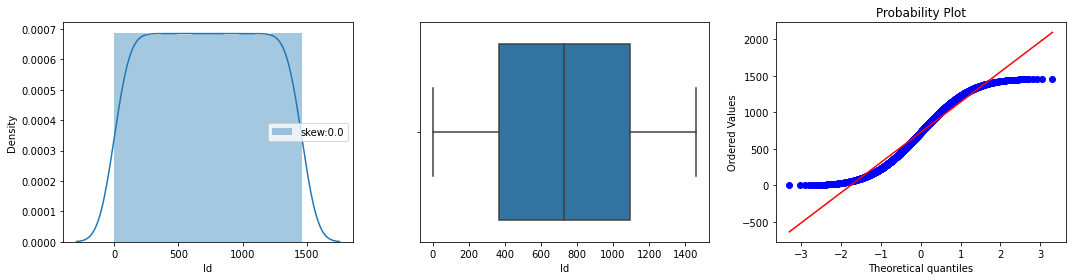

0.01      15.59
0.02      30.18
0.03      44.77
0.04      59.36
0.25     365.75
0.50     730.50
0.90    1314.10
0.95    1387.05
0.96    1401.64
0.97    1416.23
0.98    1430.82
0.99    1445.41
1.00    1460.00
Name: Id, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


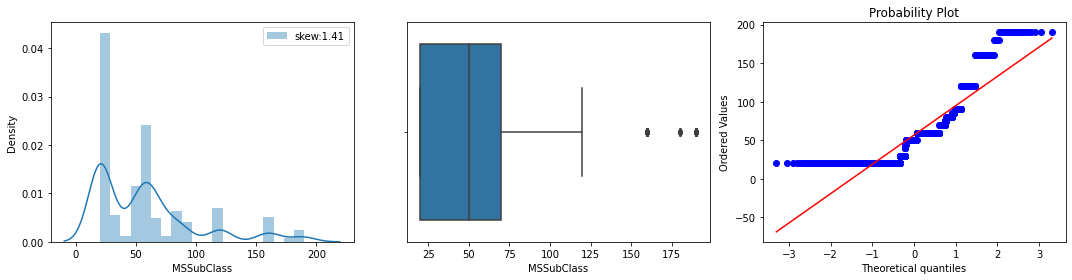

0.01     20.0
0.02     20.0
0.03     20.0
0.04     20.0
0.25     20.0
0.50     50.0
0.90    120.0
0.95    160.0
0.96    160.0
0.97    160.0
0.98    188.2
0.99    190.0
1.00    190.0
Name: MSSubClass, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


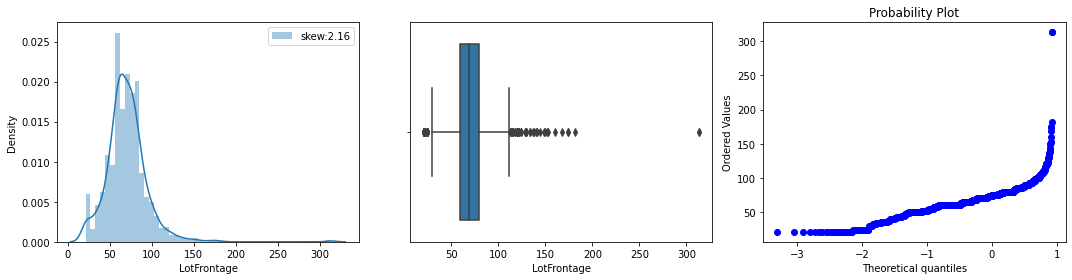

0.01     21.0
0.02     24.0
0.03     24.0
0.04     32.0
0.25     59.0
0.50     69.0
0.90     96.0
0.95    107.0
0.96    110.0
0.97    120.0
0.98    124.0
0.99    141.0
1.00    313.0
Name: LotFrontage, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


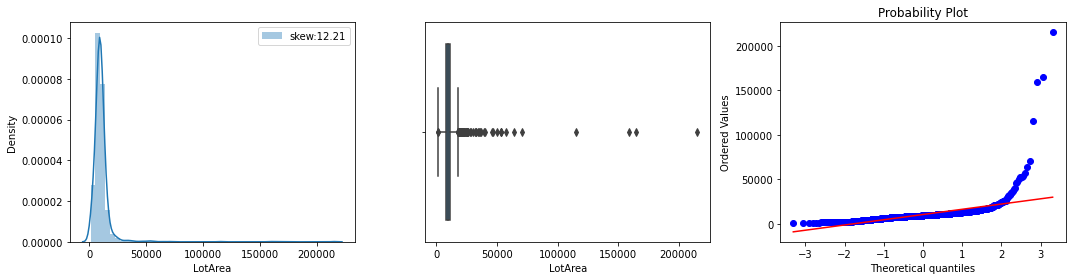

0.01      1680.00
0.02      2124.74
0.03      2522.00
0.04      3095.04
0.25      7553.50
0.50      9478.50
0.90     14381.70
0.95     17401.15
0.96     18857.60
0.97     21571.80
0.98     25251.62
0.99     37567.64
1.00    215245.00
Name: LotArea, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


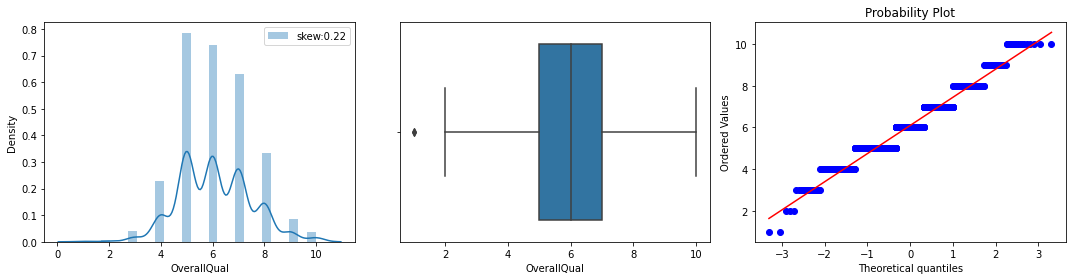

0.01     3.0
0.02     4.0
0.03     4.0
0.04     4.0
0.25     5.0
0.50     6.0
0.90     8.0
0.95     8.0
0.96     9.0
0.97     9.0
0.98     9.0
0.99    10.0
1.00    10.0
Name: OverallQual, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


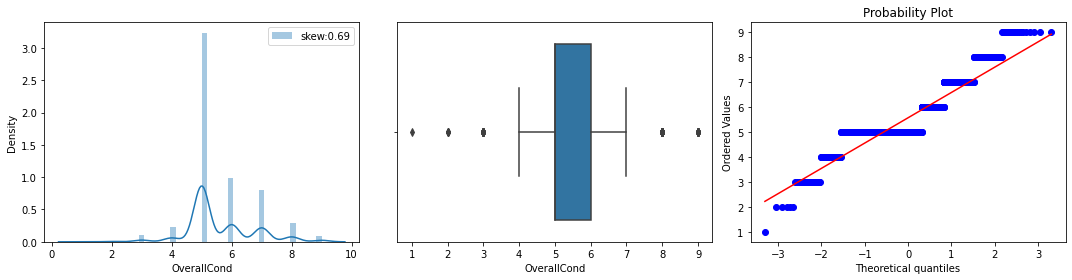

0.01    3.0
0.02    3.0
0.03    4.0
0.04    4.0
0.25    5.0
0.50    5.0
0.90    7.0
0.95    8.0
0.96    8.0
0.97    8.0
0.98    8.0
0.99    9.0
1.00    9.0
Name: OverallCond, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


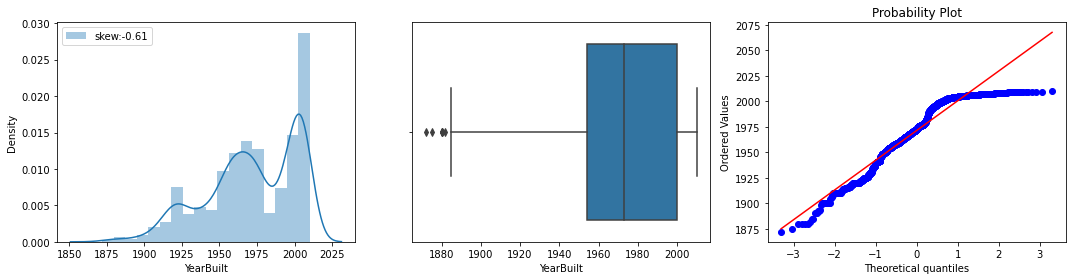

0.01    1899.18
0.02    1908.36
0.03    1910.00
0.04    1914.36
0.25    1954.00
0.50    1973.00
0.90    2006.00
0.95    2007.00
0.96    2007.00
0.97    2007.00
0.98    2008.00
0.99    2009.00
1.00    2010.00
Name: YearBuilt, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


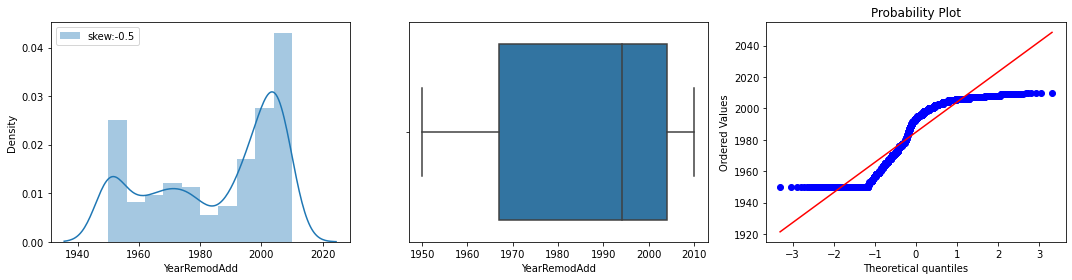

0.01    1950.0
0.02    1950.0
0.03    1950.0
0.04    1950.0
0.25    1967.0
0.50    1994.0
0.90    2006.0
0.95    2007.0
0.96    2008.0
0.97    2008.0
0.98    2008.0
0.99    2009.0
1.00    2010.0
Name: YearRemodAdd, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


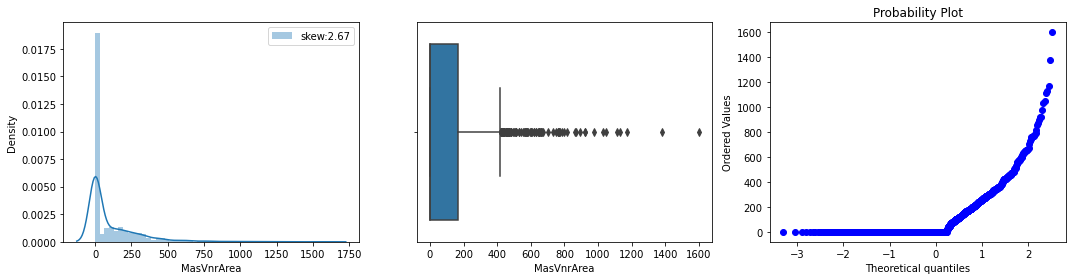

0.01       0.00
0.02       0.00
0.03       0.00
0.04       0.00
0.25       0.00
0.50       0.00
0.90     335.00
0.95     456.00
0.96     490.60
0.97     574.41
0.98     650.98
0.99     791.92
1.00    1600.00
Name: MasVnrArea, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


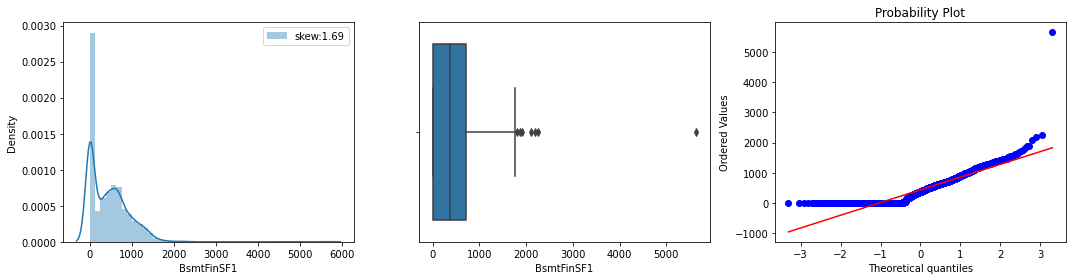

0.01       0.00
0.02       0.00
0.03       0.00
0.04       0.00
0.25       0.00
0.50     383.50
0.90    1065.50
0.95    1274.00
0.96    1309.00
0.97    1375.99
0.98    1442.64
0.99    1572.41
1.00    5644.00
Name: BsmtFinSF1, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


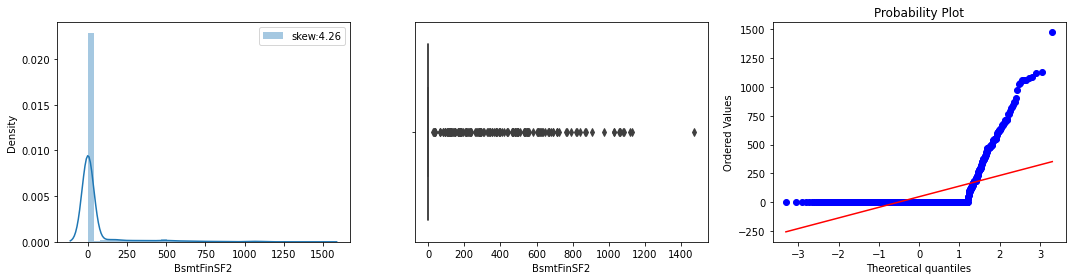

0.01       0.00
0.02       0.00
0.03       0.00
0.04       0.00
0.25       0.00
0.50       0.00
0.90     117.20
0.95     396.20
0.96     479.64
0.97     546.23
0.98     658.12
0.99     830.38
1.00    1474.00
Name: BsmtFinSF2, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


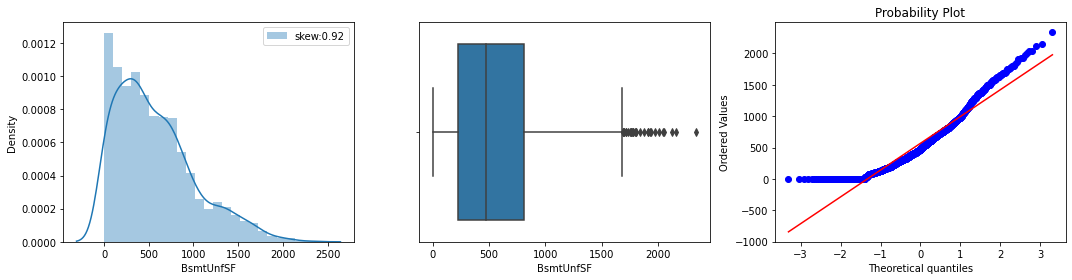

0.01       0.00
0.02       0.00
0.03       0.00
0.04       0.00
0.25     223.00
0.50     477.50
0.90    1232.00
0.95    1468.00
0.96    1523.32
0.97    1589.38
0.98    1678.20
0.99    1797.05
1.00    2336.00
Name: BsmtUnfSF, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


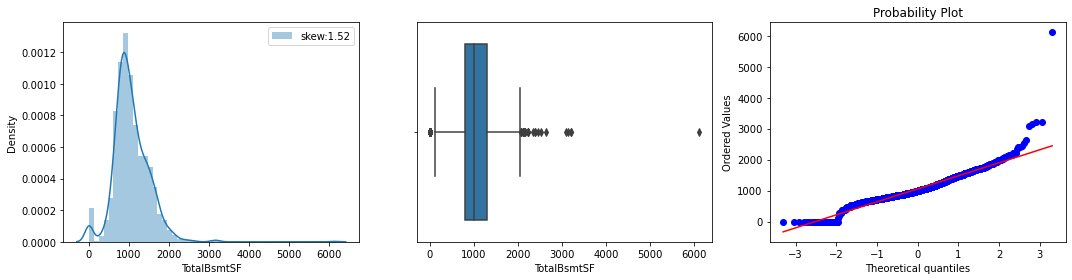

0.01       0.00
0.02       0.00
0.03     312.33
0.04     446.48
0.25     795.75
0.50     991.50
0.90    1602.20
0.95    1753.00
0.96    1834.92
0.97    1905.46
0.98    2001.64
0.99    2155.05
1.00    6110.00
Name: TotalBsmtSF, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


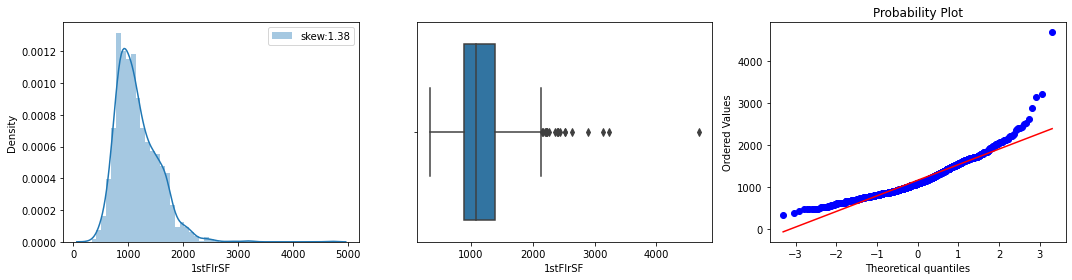

0.01     520.00
0.02     583.70
0.03     625.00
0.04     660.36
0.25     882.00
0.50    1087.00
0.90    1680.00
0.95    1831.25
0.96    1882.24
0.97    1981.61
0.98    2072.28
0.99    2219.46
1.00    4692.00
Name: 1stFlrSF, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


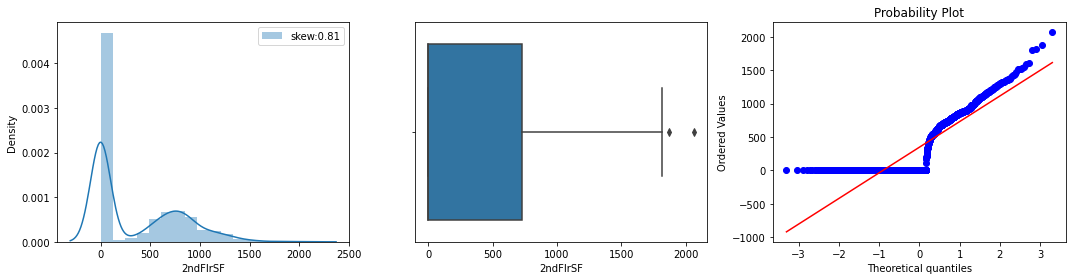

0.01       0.00
0.02       0.00
0.03       0.00
0.04       0.00
0.25       0.00
0.50       0.00
0.90     954.20
0.95    1141.05
0.96    1183.92
0.97    1245.53
0.98    1318.56
0.99    1418.92
1.00    2065.00
Name: 2ndFlrSF, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


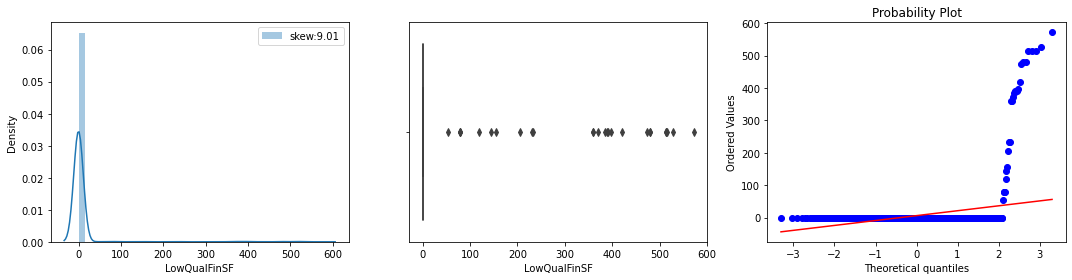

0.01      0.0
0.02      0.0
0.03      0.0
0.04      0.0
0.25      0.0
0.50      0.0
0.90      0.0
0.95      0.0
0.96      0.0
0.97      0.0
0.98      0.0
0.99    360.0
1.00    572.0
Name: LowQualFinSF, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


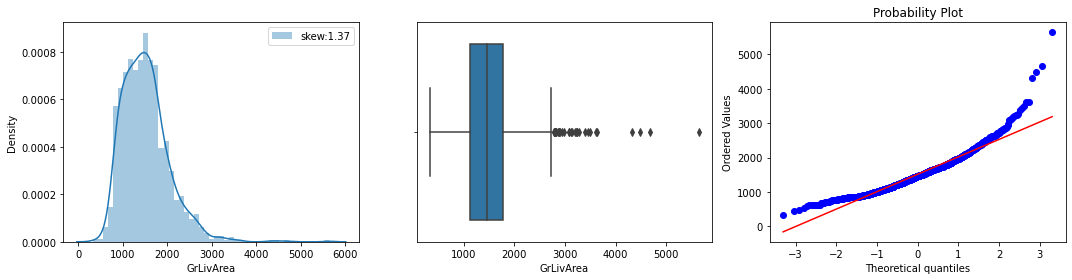

0.01     692.18
0.02     768.00
0.03     796.00
0.04     828.80
0.25    1129.50
0.50    1464.00
0.90    2158.30
0.95    2466.10
0.96    2545.72
0.97    2633.23
0.98    2782.38
0.99    3123.48
1.00    5642.00
Name: GrLivArea, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


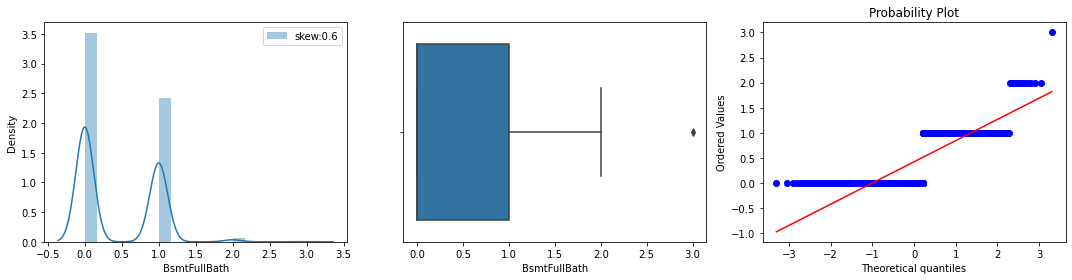

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    0.0
0.90    1.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    2.0
1.00    3.0
Name: BsmtFullBath, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


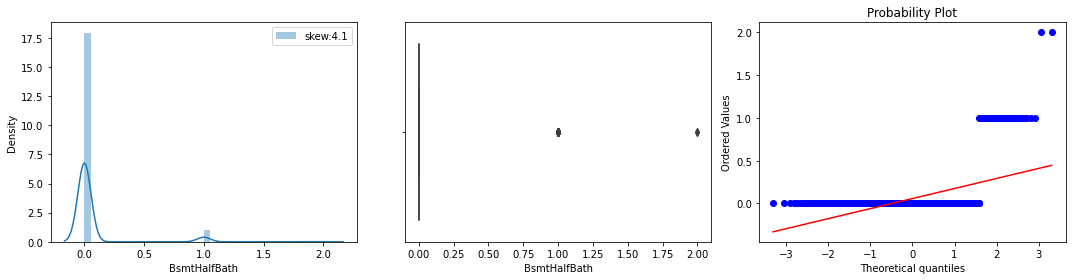

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    0.0
0.90    0.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
1.00    2.0
Name: BsmtHalfBath, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


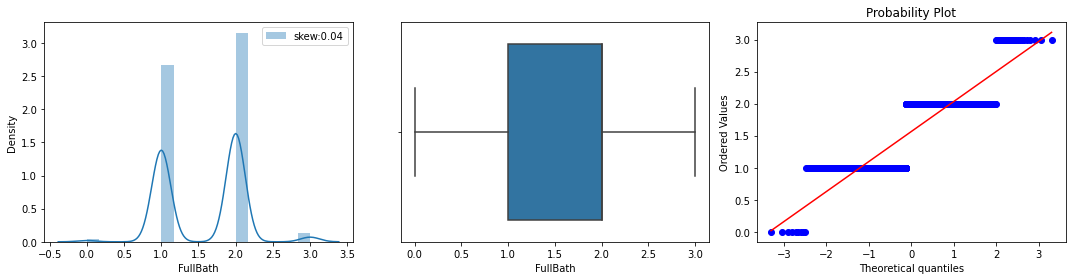

0.01    1.0
0.02    1.0
0.03    1.0
0.04    1.0
0.25    1.0
0.50    2.0
0.90    2.0
0.95    2.0
0.96    2.0
0.97    2.0
0.98    3.0
0.99    3.0
1.00    3.0
Name: FullBath, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


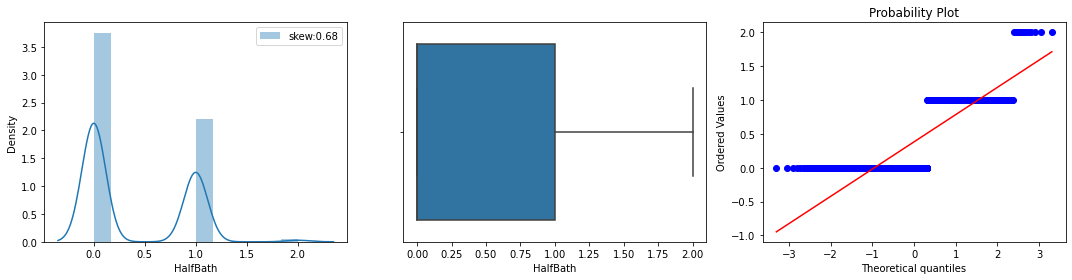

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    0.0
0.90    1.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
1.00    2.0
Name: HalfBath, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


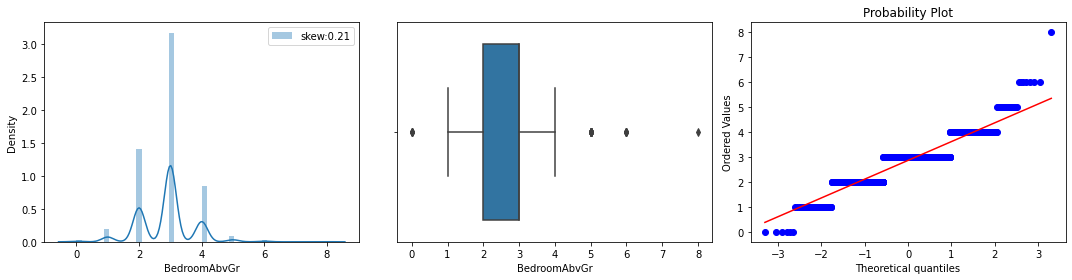

0.01    1.0
0.02    1.0
0.03    1.0
0.04    2.0
0.25    2.0
0.50    3.0
0.90    4.0
0.95    4.0
0.96    4.0
0.97    4.0
0.98    4.0
0.99    5.0
1.00    8.0
Name: BedroomAbvGr, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


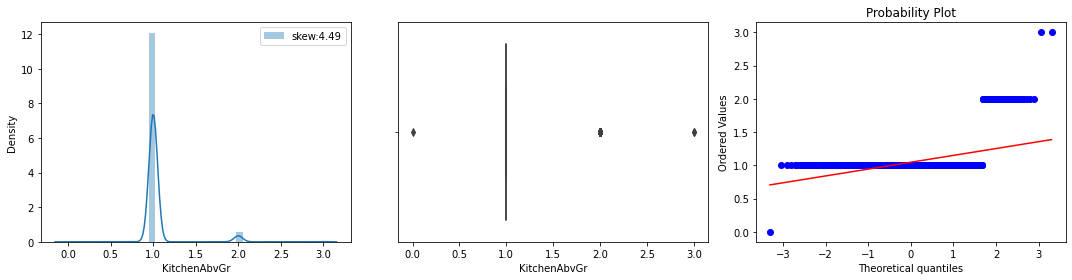

0.01    1.0
0.02    1.0
0.03    1.0
0.04    1.0
0.25    1.0
0.50    1.0
0.90    1.0
0.95    1.0
0.96    2.0
0.97    2.0
0.98    2.0
0.99    2.0
1.00    3.0
Name: KitchenAbvGr, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


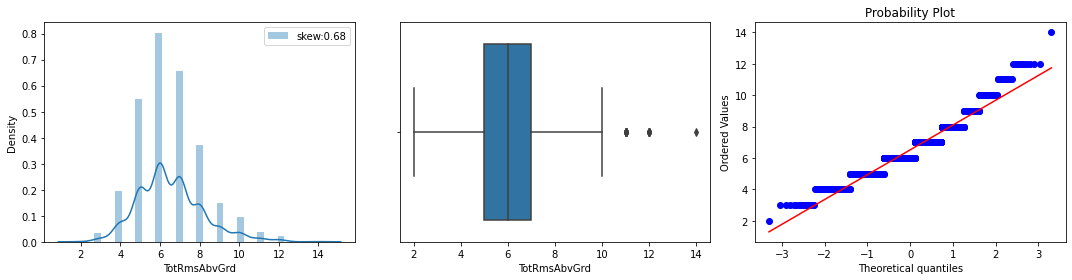

0.01     3.00
0.02     4.00
0.03     4.00
0.04     4.00
0.25     5.00
0.50     6.00
0.90     9.00
0.95    10.00
0.96    10.00
0.97    10.00
0.98    10.82
0.99    11.00
1.00    14.00
Name: TotRmsAbvGrd, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


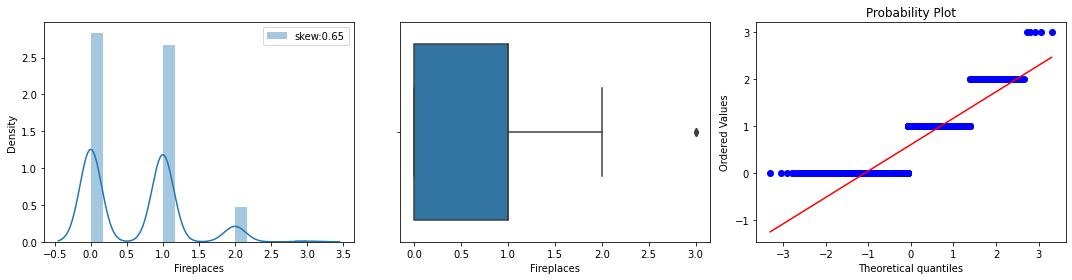

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    1.0
0.90    1.0
0.95    2.0
0.96    2.0
0.97    2.0
0.98    2.0
0.99    2.0
1.00    3.0
Name: Fireplaces, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


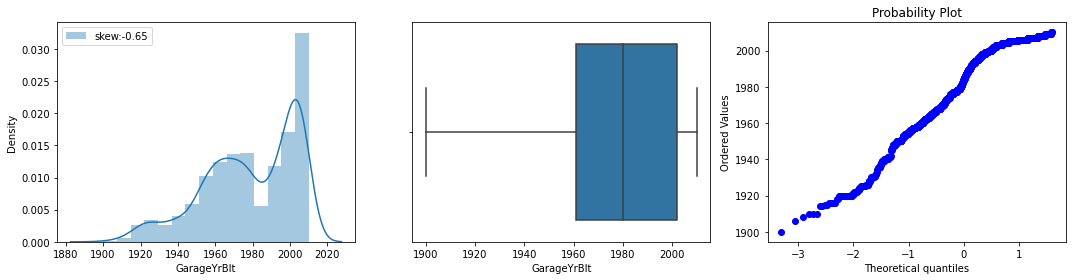

0.01    1916.00
0.02    1920.00
0.03    1923.34
0.04    1926.00
0.25    1961.00
0.50    1980.00
0.90    2006.00
0.95    2007.00
0.96    2007.00
0.97    2008.00
0.98    2008.00
0.99    2009.00
1.00    2010.00
Name: GarageYrBlt, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


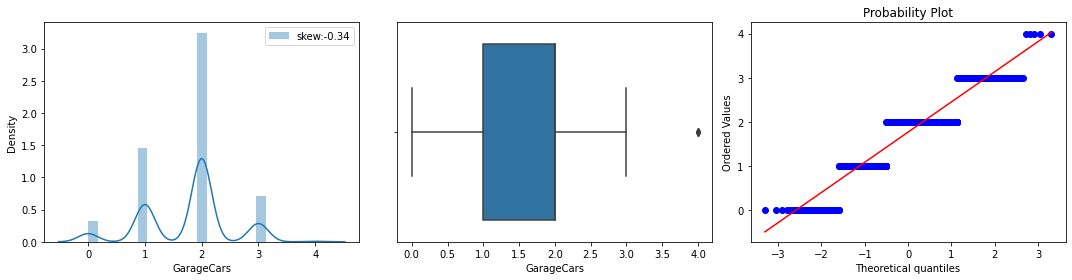

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    1.0
0.50    2.0
0.90    3.0
0.95    3.0
0.96    3.0
0.97    3.0
0.98    3.0
0.99    3.0
1.00    4.0
Name: GarageCars, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


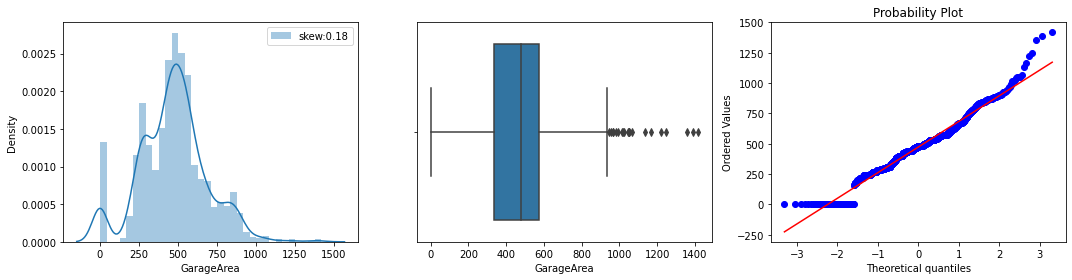

0.01       0.00
0.02       0.00
0.03       0.00
0.04       0.00
0.25     334.50
0.50     480.00
0.90     757.10
0.95     850.10
0.96     867.28
0.97     884.00
0.98     907.46
0.99    1002.79
1.00    1418.00
Name: GarageArea, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


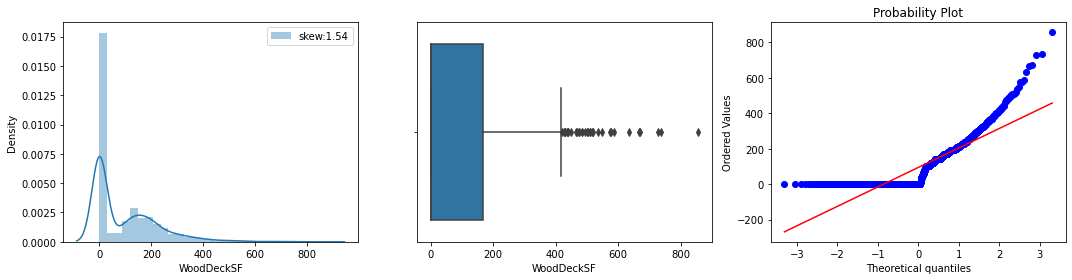

0.01      0.00
0.02      0.00
0.03      0.00
0.04      0.00
0.25      0.00
0.50      0.00
0.90    262.00
0.95    335.00
0.96    359.20
0.97    385.38
0.98    430.10
0.99    505.46
1.00    857.00
Name: WoodDeckSF, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


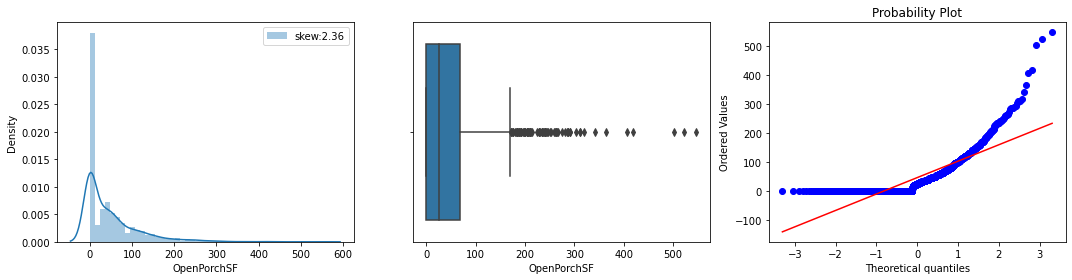

0.01      0.00
0.02      0.00
0.03      0.00
0.04      0.00
0.25      0.00
0.50     25.00
0.90    130.00
0.95    175.05
0.96    193.92
0.97    213.23
0.98    240.82
0.99    285.82
1.00    547.00
Name: OpenPorchSF, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


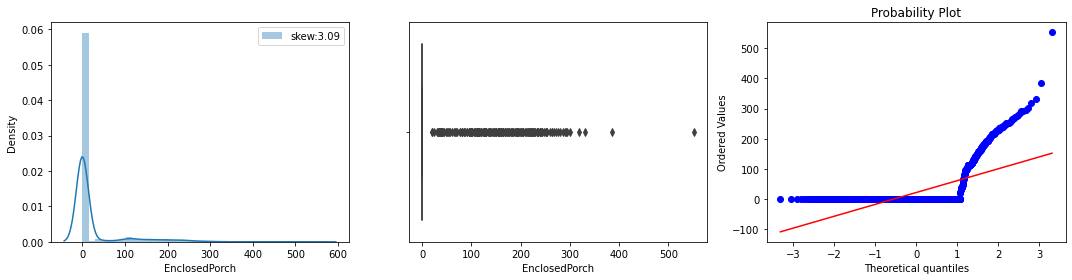

0.01      0.00
0.02      0.00
0.03      0.00
0.04      0.00
0.25      0.00
0.50      0.00
0.90    112.00
0.95    180.15
0.96    193.28
0.97    216.00
0.98    235.64
0.99    261.05
1.00    552.00
Name: EnclosedPorch, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


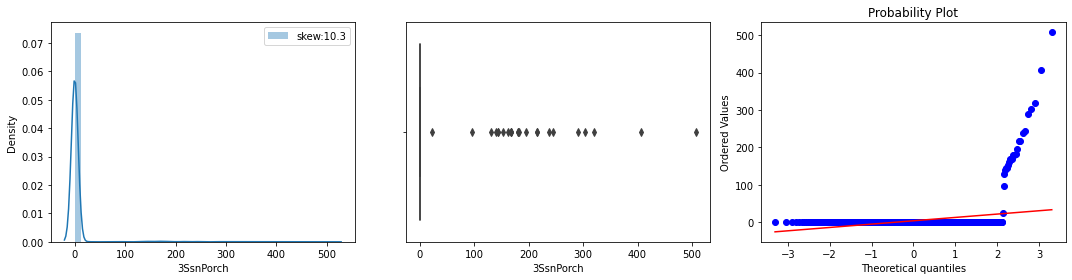

0.01      0.0
0.02      0.0
0.03      0.0
0.04      0.0
0.25      0.0
0.50      0.0
0.90      0.0
0.95      0.0
0.96      0.0
0.97      0.0
0.98      0.0
0.99    168.0
1.00    508.0
Name: 3SsnPorch, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


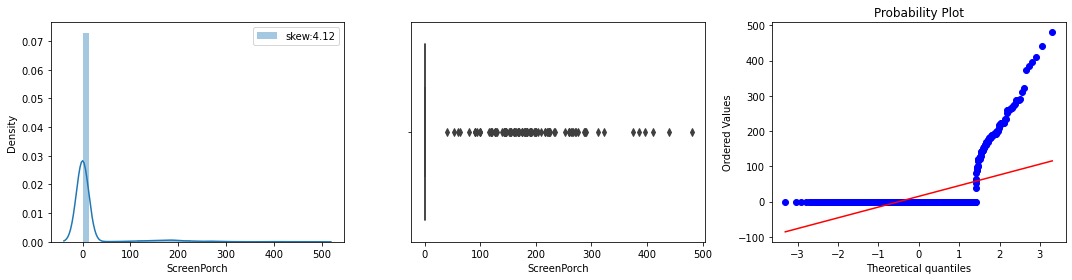

0.01      0.00
0.02      0.00
0.03      0.00
0.04      0.00
0.25      0.00
0.50      0.00
0.90      0.00
0.95    160.00
0.96    180.00
0.97    192.00
0.98    223.64
0.99    268.05
1.00    480.00
Name: ScreenPorch, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


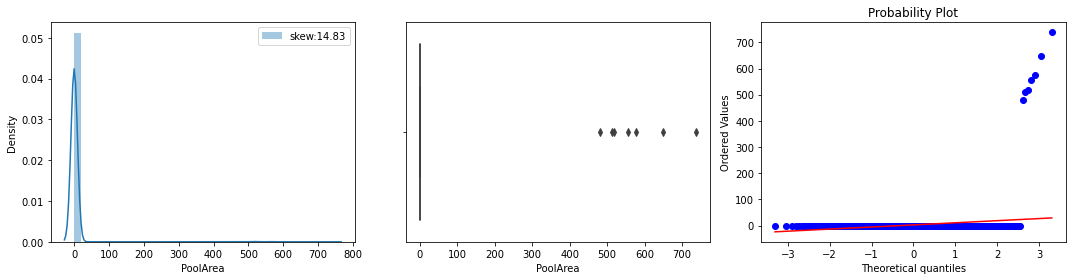

0.01      0.0
0.02      0.0
0.03      0.0
0.04      0.0
0.25      0.0
0.50      0.0
0.90      0.0
0.95      0.0
0.96      0.0
0.97      0.0
0.98      0.0
0.99      0.0
1.00    738.0
Name: PoolArea, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


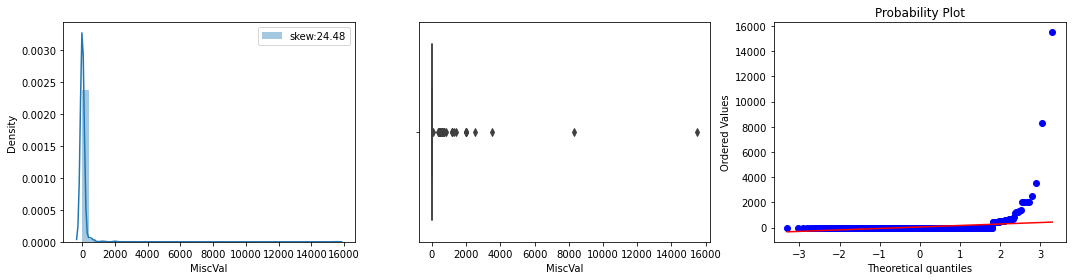

0.01        0.0
0.02        0.0
0.03        0.0
0.04        0.0
0.25        0.0
0.50        0.0
0.90        0.0
0.95        0.0
0.96        0.0
0.97      400.0
0.98      500.0
0.99      700.0
1.00    15500.0
Name: MiscVal, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


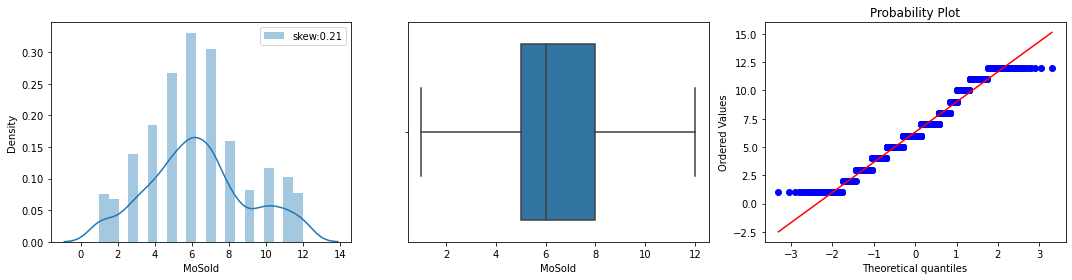

0.01     1.00
0.02     1.00
0.03     1.00
0.04     2.00
0.25     5.00
0.50     6.00
0.90    10.00
0.95    11.00
0.96    11.64
0.97    12.00
0.98    12.00
0.99    12.00
1.00    12.00
Name: MoSold, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


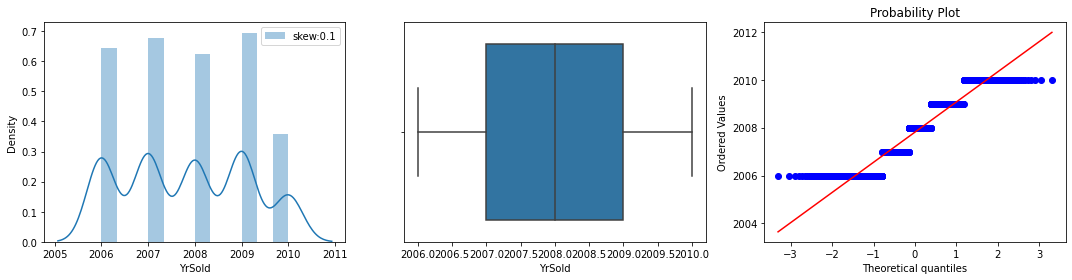

0.01    2006.0
0.02    2006.0
0.03    2006.0
0.04    2006.0
0.25    2007.0
0.50    2008.0
0.90    2010.0
0.95    2010.0
0.96    2010.0
0.97    2010.0
0.98    2010.0
0.99    2010.0
1.00    2010.0
Name: YrSold, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


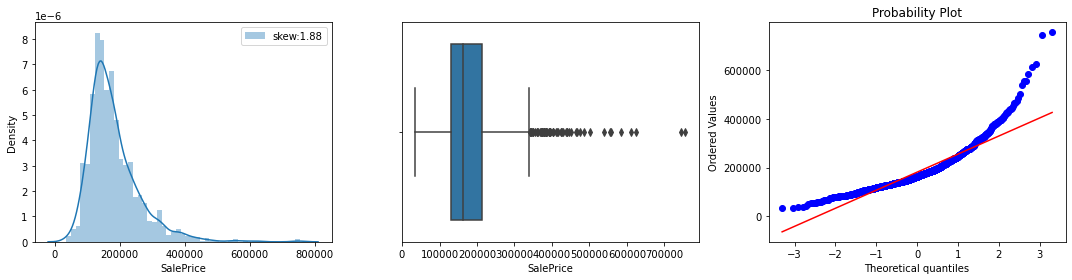

0.01     61815.97
0.02     79000.00
0.03     82000.00
0.04     85000.00
0.25    129975.00
0.50    163000.00
0.90    278000.00
0.95    326100.00
0.96    344151.48
0.97    374230.00
0.98    394931.06
0.99    442567.01
1.00    755000.00
Name: SalePrice, dtype: float64


In [12]:
columns = raw_data.columns.values.tolist()

for column_names in columns:
    if raw_data[f'{column_names}'].dtype != 'object':
        
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        sns.distplot(raw_data[f'{column_names}'], label='skew:' + str(np.round(raw_data[f'{column_names}'].skew(),2)))
        plt.legend()
        
        plt.subplot(132)
        sns.boxplot(raw_data[f'{column_names}'])
        
        plt.subplot(133)
        stats.probplot(raw_data[f'{column_names}'], plot=plt)
        
        plt.tight_layout()
        plt.show()
        
        print(raw_data[f'{column_names}'].quantile([0.01,0.02,0.03,0.04, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0]))

## Crosschecking temporal features like date/time

In [13]:
year_feature = [feature for feature in raw_data_numeric if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
for feature in year_feature:
    print(feature, raw_data_numeric[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

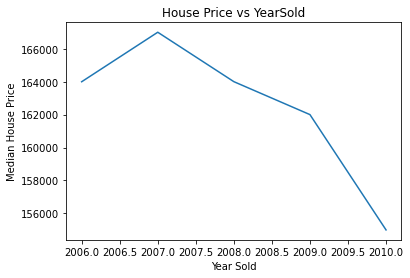

In [15]:
raw_data_numeric.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

### it can be interpreted from above plot that the median price of real estate was high in the year 2007 and after that the real estate market went a bit down

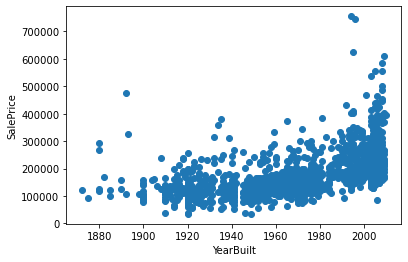

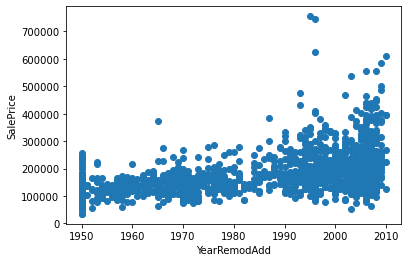

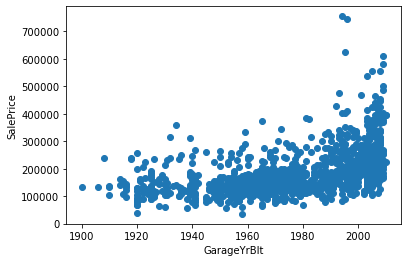

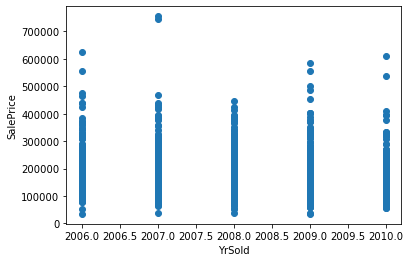

In [16]:
for columns in year_feature:
    plt.scatter(raw_data_numeric[columns], raw_data_numeric['SalePrice'])
    plt.xlabel(columns)
    plt.ylabel('SalePrice')
    plt.show()

## Checking correlations between the numeric features

In [17]:
raw_data_numeric.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

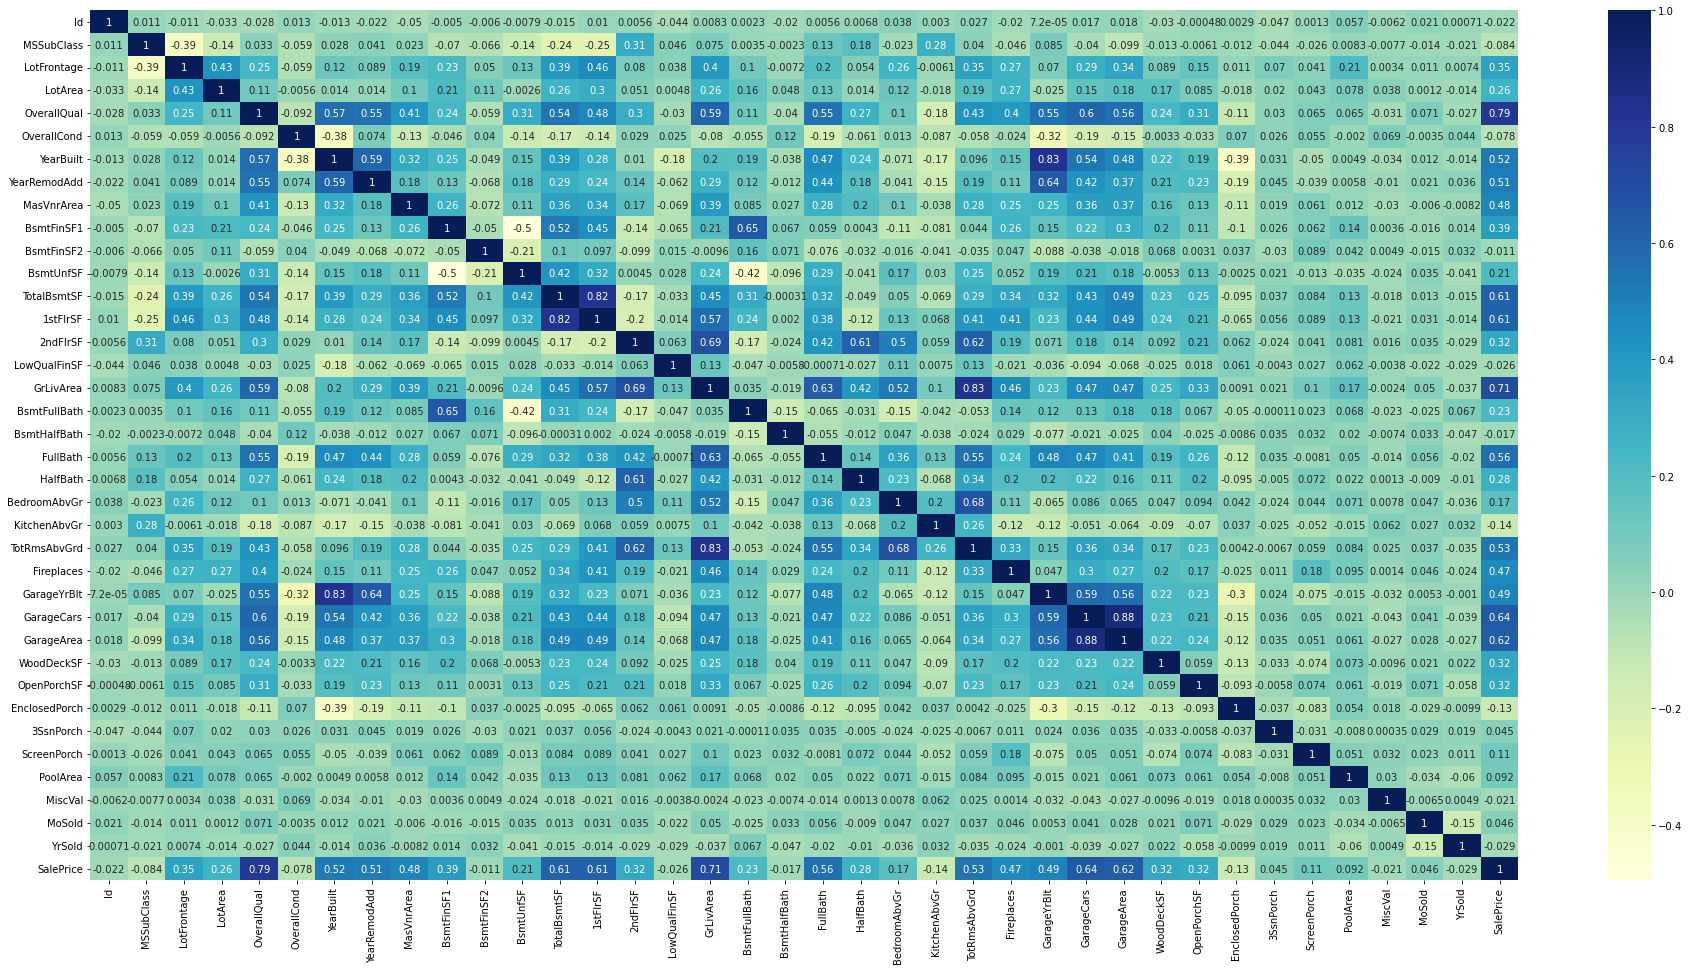

In [18]:
# figure size
plt.figure(figsize=(32, 16))

# heatmap
sns.heatmap(raw_data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.savefig('raw_data_numeric_corr.png')
plt.show()

In [19]:
correlations = raw_data_numeric.corr().abs()
correlations.head(40)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,0.010601,0.033226,0.028365,0.012609,0.012713,0.021998,0.050298,0.005024,0.005968,0.007940,0.015415,0.010496,0.005590,0.044230,0.008273,0.002289,0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,0.019772,0.000072,0.016570,0.017634,0.029643,0.000477,0.002889,0.046635,0.001330,0.057044,0.006242,0.021172,0.000712,0.021917
MSSubClass,0.011156,1.000000,0.386347,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,0.065649,0.140759,0.238518,0.251758,0.307886,0.046474,0.074853,0.003491,0.002333,0.131608,0.177354,0.023438,0.281721,0.040380,0.045569,0.085072,0.040110,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284
LotFrontage,0.010601,0.386347,1.000000,0.426095,0.251646,0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,0.007234,0.198769,0.053532,0.263170,0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.033226,0.139781,0.426095,1.000000,0.105806,0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.017784,0.190015,0.271364,0.024947,0.154871,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,0.028365,0.032628,0.251646,0.105806,1.000000,0.091932,0.572323,0.550684,0.411876,0.239666,0.059119,0.308159,0.537808,0.476224,0.295493,0.030429,0.593007,0.111098,0.040150,0.550600,0.273458,0.101676,0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982
OverallCond,0.012609,0.059316,0.059213,0.005636,0.091932,1.000000,0.375983,0.073741,0.128101,0.046231,0.040229,0.136841,0.171098,0.144203,0.028942,0.025494,0.079686,0.054942,0.117821,0.194149,0.060769,0.012980,0.087001,0.057583,0.023820,0.324297,0.185758,0.151521,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950,0.077856
YearBuilt,0.012713,0.027850,0.123349,0.014228,0.572323,0.375983,1.000000,0.592855,0.315707,0.249503,0.049107,0.149040,0.391452,0.281986,0.010308,0.183784,0.199010,0.187599,0.038162,0.468271,0.242656,0.070651,0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618,0.522897
YearRemodAdd,0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.067759,0.181133,0.291066,0.240379,0.140024,0.062419,0.287389,0.119470,0.012337,0.439046,0.183331,0.040581,0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.193919,0.045286,0.038740,0.005829,0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.050298,0.022936,0.193458,0.104160,0.411876,0.128101,0.315707,0.179618,1.000000,0.264736,0.072319,0.114442,0.363936,0.344501,0.174561,0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,0.110204,0.018796,0.061466,0.011723,0.029815,0.005965,0.008201,0.477493
BsmtFinSF1,0.005024,0.069836,0.233633,0.214103,0.239666,0.046231,0.249503,0.128451,0.264736,1.000000,0.050117,0.495251,0.522396,0.445863,0.137079,0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,0.107355,0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359,0.386420


In [20]:
correlations.loc[correlations['SalePrice'] <= 0.05]['SalePrice']

Id              0.021917
BsmtFinSF2      0.011378
LowQualFinSF    0.025606
BsmtHalfBath    0.016844
3SsnPorch       0.044584
MiscVal         0.021190
MoSold          0.046432
YrSold          0.028923
Name: SalePrice, dtype: float64

### Findings from Numerical features
1. No specific outliers detected. Yes, there are some exorbitant values, but based on manual intervention it can't be treated as outlier

2. Missing value handling should be done in the feature engineering section

3. Based on business decisions, lowest correlation values could have been dropped. Keeping as of now just to consider as a testing purpose







# 

## Analysing the categorical data

In [21]:
raw_data_categorical.shape

(1460, 43)

In [22]:
raw_data_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
categorical_columns = raw_data_categorical.columns.values.tolist()
for columns in categorical_columns:
    print('Feature {} has {} categories'.format(columns,len(raw_data_categorical[columns].unique())))

Feature MSZoning has 5 categories
Feature Street has 2 categories
Feature Alley has 3 categories
Feature LotShape has 4 categories
Feature LandContour has 4 categories
Feature Utilities has 2 categories
Feature LotConfig has 5 categories
Feature LandSlope has 3 categories
Feature Neighborhood has 25 categories
Feature Condition1 has 9 categories
Feature Condition2 has 8 categories
Feature BldgType has 5 categories
Feature HouseStyle has 8 categories
Feature RoofStyle has 6 categories
Feature RoofMatl has 8 categories
Feature Exterior1st has 15 categories
Feature Exterior2nd has 16 categories
Feature MasVnrType has 5 categories
Feature ExterQual has 4 categories
Feature ExterCond has 5 categories
Feature Foundation has 6 categories
Feature BsmtQual has 5 categories
Feature BsmtCond has 5 categories
Feature BsmtExposure has 5 categories
Feature BsmtFinType1 has 7 categories
Feature BsmtFinType2 has 7 categories
Feature Heating has 6 categories
Feature HeatingQC has 5 categories
Feature C

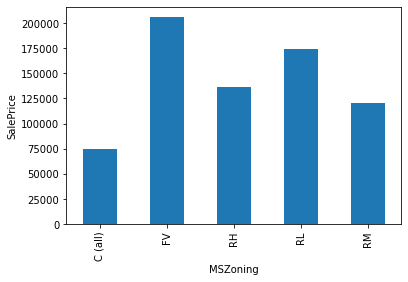

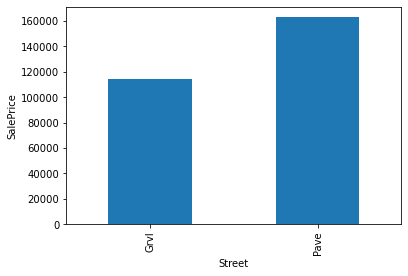

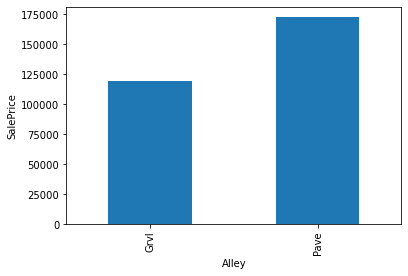

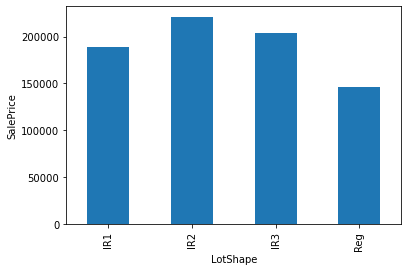

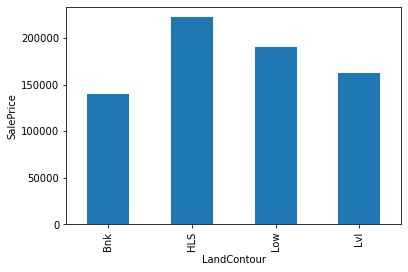

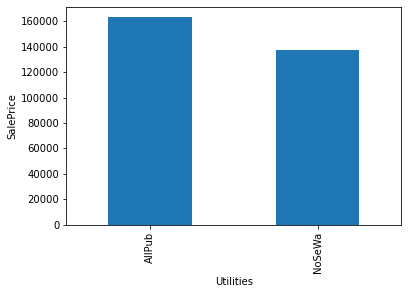

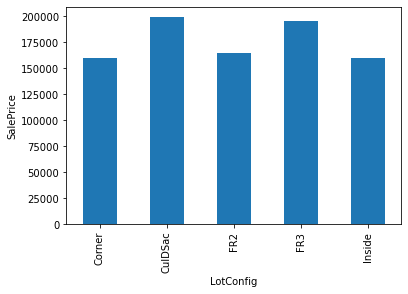

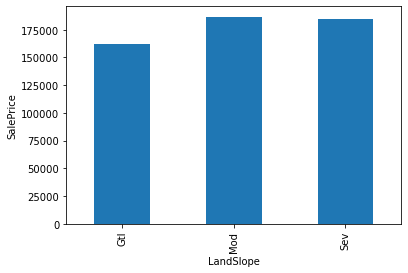

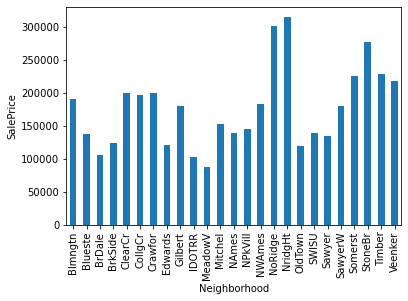

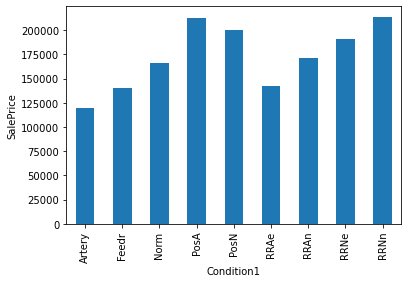

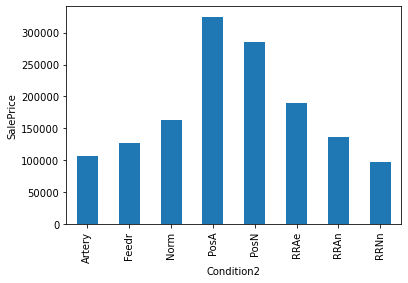

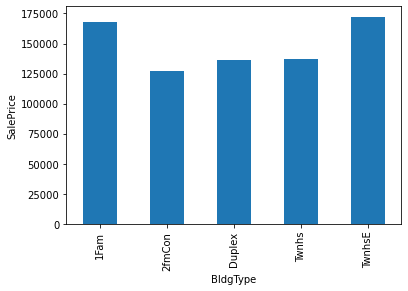

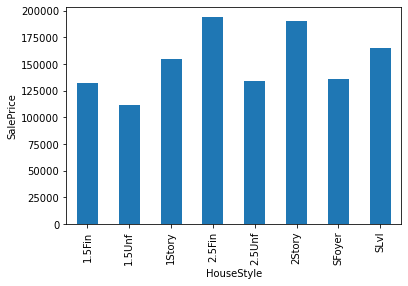

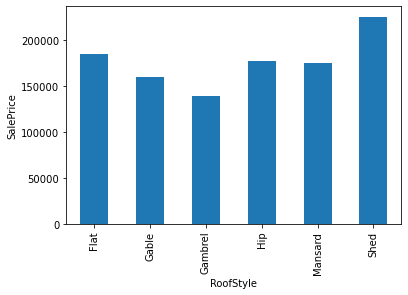

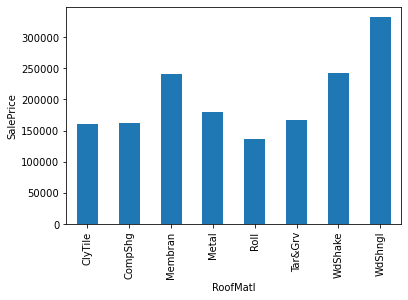

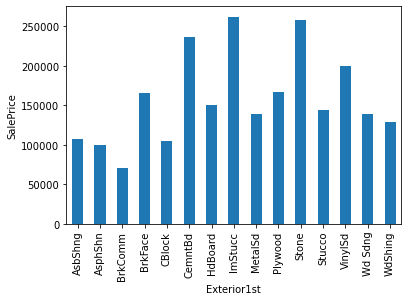

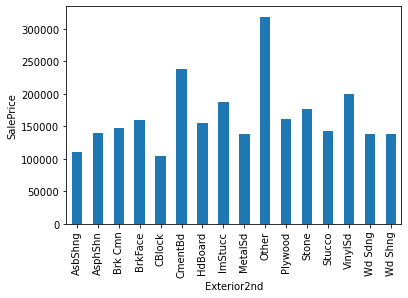

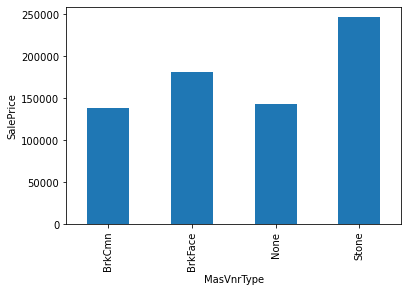

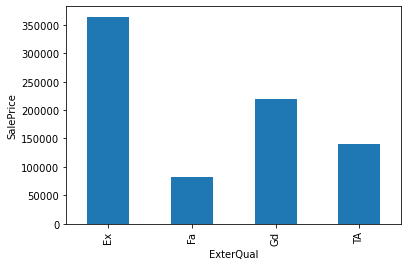

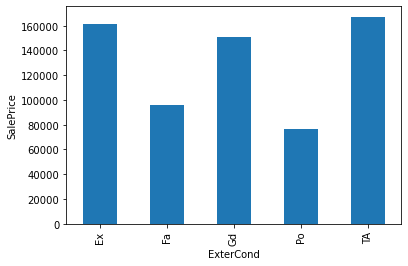

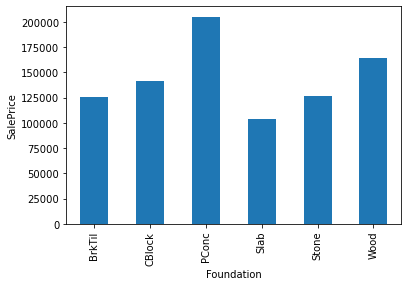

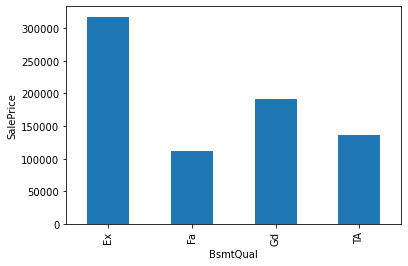

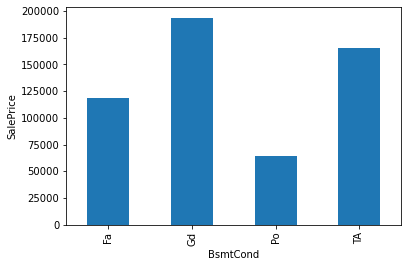

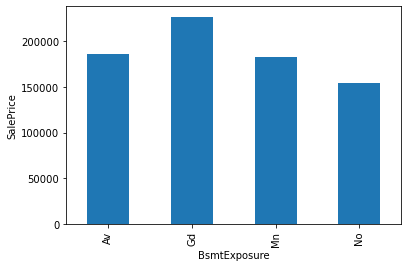

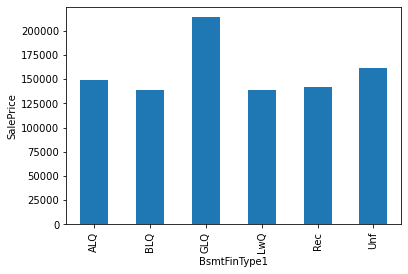

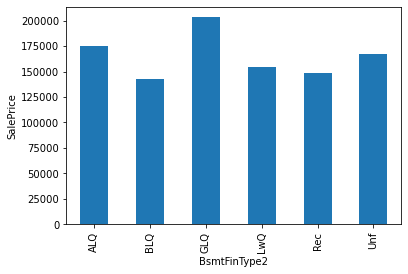

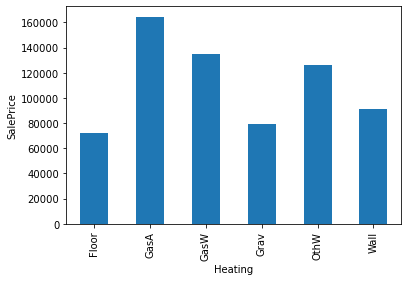

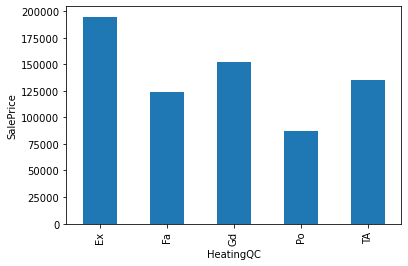

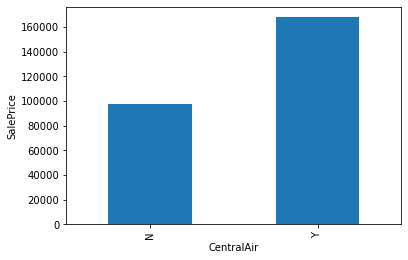

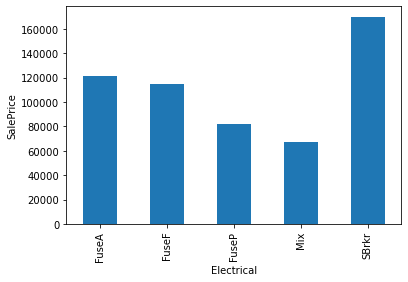

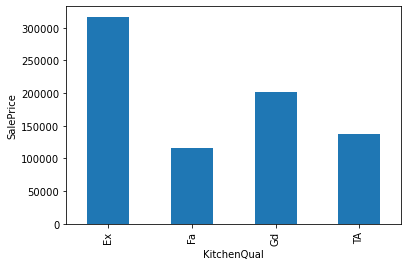

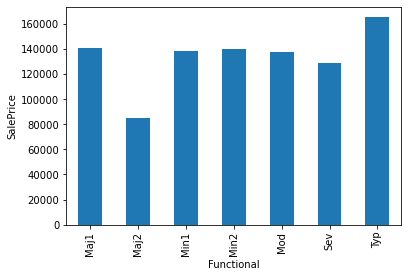

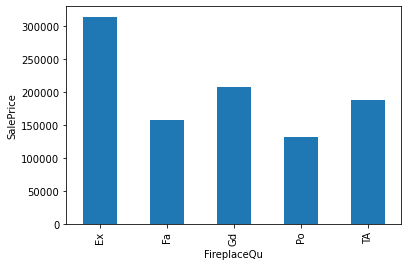

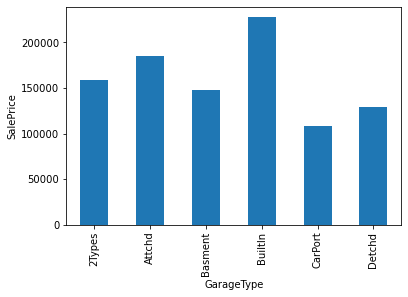

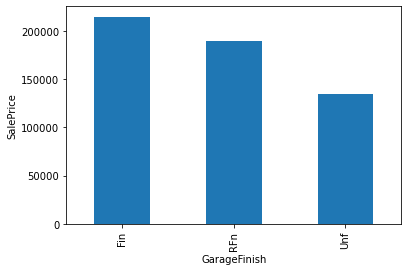

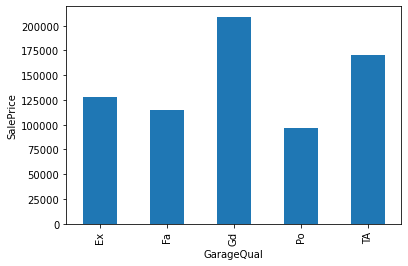

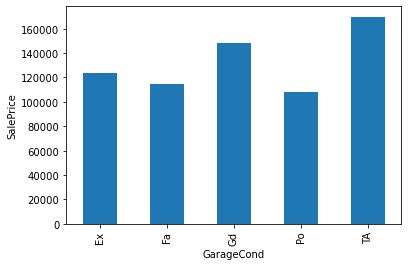

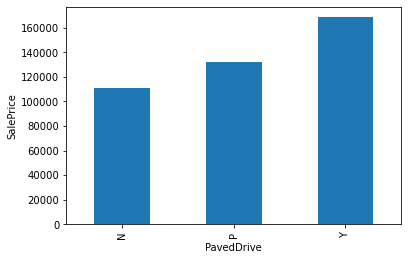

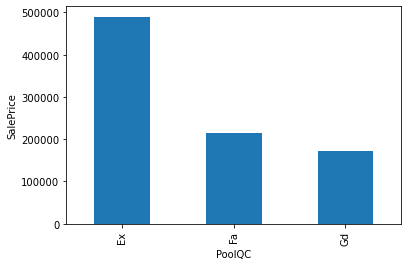

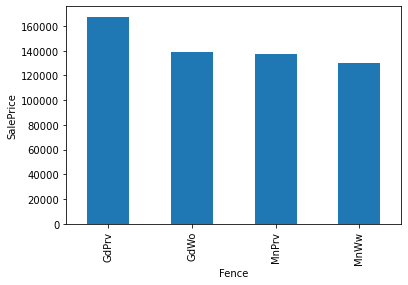

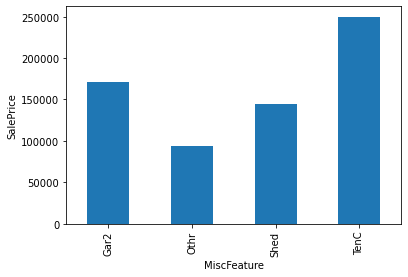

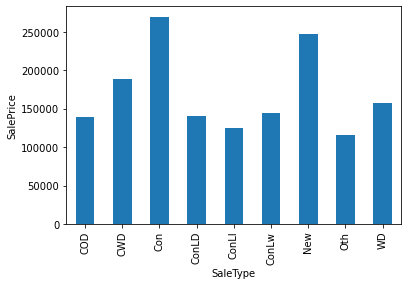

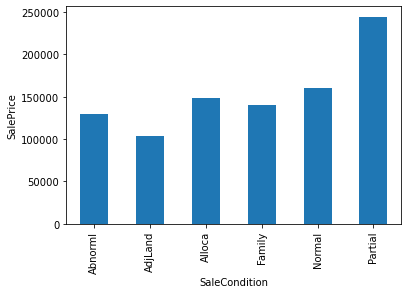

In [24]:
categorical_columns = raw_data_categorical.columns.values.tolist()
for columns in categorical_columns:
    raw_data.groupby(columns)['SalePrice'].median().plot.bar()
    plt.xlabel(columns)
    plt.ylabel('SalePrice')
    plt.show()

# Feature Engineering

## handling missing values

In [25]:
raw_data_numeric_fe = raw_data.select_dtypes(exclude=['object'])
raw_data_categorical_fe = raw_data.select_dtypes(include=['object'])

num_columns = raw_data_numeric_fe.columns.values.tolist()
cat_columns = raw_data_categorical_fe.columns.values.tolist()

In [26]:
# print numeric fields having null values
for columns in num_columns:
    if raw_data_numeric_fe[columns].isnull().sum()>1:
        print(columns, raw_data_numeric_fe[columns].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [27]:
# print categorical fields with null values
for columns in cat_columns:
    if raw_data_categorical_fe[columns].isnull().sum()>1:
        print(columns, raw_data_categorical_fe[columns].isnull().sum())

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [28]:
# replace null values of numeric fields with its median value
for columns in num_columns:
    if raw_data_numeric_fe[columns].isnull().sum()>1:
        raw_data_numeric_fe[columns].fillna(raw_data_numeric_fe[columns].median(), inplace=True)

In [29]:
# replace null values of numeric fields with new label 'N/A'
for columns in cat_columns:
    if raw_data_categorical_fe[columns].isnull().sum()>1:
        raw_data_categorical_fe[columns].fillna('N/A', inplace=True)

In [30]:
raw_data_numeric_fe.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [31]:
raw_data_categorical_fe.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,N/A,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
1,RL,Pave,N/A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
2,RL,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
3,RL,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,N/A,N/A,N/A,WD,Abnorml
4,RL,Pave,N/A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal


In [32]:
# Determining the age of the house w.r.t the year sold
year_feature = [feature for feature in raw_data_numeric_fe if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [33]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    raw_data_numeric_fe[feature] = raw_data_numeric_fe['YrSold'] - raw_data_numeric_fe[feature]

In [34]:
raw_data_numeric_fe.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,31,31,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,7,6,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,91,36,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,8.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,8,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [35]:
#scaling the numeric data except the id and the saleprice column
raw_data_numeric_fe_prescale = raw_data_numeric_fe.drop(['Id', 'SalePrice'], axis=1)
scaling_columns = raw_data_numeric_fe_prescale.columns.values.tolist()
scaler = StandardScaler()
scaled = scaler.fit_transform(raw_data_numeric_fe_prescale[scaling_columns])

In [36]:
raw_data_numeric_fe_final = pd.concat([raw_data_numeric_fe[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaled, columns=scaling_columns)], axis=1)

In [37]:
raw_data_numeric_fe_final.shape

(1460, 38)

In [38]:
raw_data_numeric_fe_final.head()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,208500,0.073375,-0.220875,-0.207142,0.651479,-0.517200,-1.043259,-0.869941,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,-1.008328,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,2,181500,-0.872563,0.460320,-0.091886,-0.071836,2.179628,-0.183465,0.390141,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.073805,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,3,223500,0.073375,-0.084636,0.073480,0.651479,-0.517200,-0.977121,-0.821476,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,-0.925087,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,4,140000,0.309859,-0.447940,-0.096897,0.651479,-0.517200,1.800676,0.632464,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,-0.883467,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,5,250000,0.073375,0.641972,0.375148,1.374795,-0.517200,-0.944052,-0.724547,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,-0.883467,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [39]:
# label encoding the categorical features
le = LabelEncoder()
raw_data_categorical_fe = raw_data_categorical_fe[cat_columns].apply(le.fit_transform)
raw_data_categorical_fe.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,1,4,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4


In [40]:
raw_data_categorical_fe.shape

(1460, 43)

In [41]:
# making final dataset for model
raw_data_cleaned = pd.concat([raw_data_numeric_fe_final, raw_data_categorical_fe], axis=1)

In [42]:
raw_data_cleaned.shape

(1460, 81)

In [43]:
raw_data_cleaned.head()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,208500,0.073375,-0.220875,-0.207142,0.651479,-0.517200,-1.043259,-0.869941,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,-1.008328,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4
1,2,181500,-0.872563,0.460320,-0.091886,-0.071836,2.179628,-0.183465,0.390141,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.073805,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4
2,3,223500,0.073375,-0.084636,0.073480,0.651479,-0.517200,-0.977121,-0.821476,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,-0.925087,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4
3,4,140000,0.309859,-0.447940,-0.096897,0.651479,-0.517200,1.800676,0.632464,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,-0.883467,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,1,4,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0
4,5,250000,0.073375,0.641972,0.375148,1.374795,-0.517200,-0.944052,-0.724547,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,-0.883467,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4


In [44]:
# we can drop the id column as it is just for tagging purpose
raw_data_cleaned = raw_data_cleaned.drop(['Id'], axis=1)

In [45]:
raw_data_cleaned.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,208500,0.073375,-0.220875,-0.207142,0.651479,-0.517200,-1.043259,-0.869941,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,-1.008328,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4
1,181500,-0.872563,0.460320,-0.091886,-0.071836,2.179628,-0.183465,0.390141,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.073805,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4
2,223500,0.073375,-0.084636,0.073480,0.651479,-0.517200,-0.977121,-0.821476,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,-0.925087,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4
3,140000,0.309859,-0.447940,-0.096897,0.651479,-0.517200,1.800676,0.632464,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,-0.883467,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,1,4,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0
4,250000,0.073375,0.641972,0.375148,1.374795,-0.517200,-0.944052,-0.724547,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,-0.883467,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4


In [46]:
raw_data_cleaned.shape

(1460, 80)

## Split the features and the label

In [47]:
X = raw_data_cleaned.drop(['SalePrice'], axis=1)
Y = raw_data_cleaned['SalePrice']

In [48]:
X.shape, Y.shape

((1460, 79), (1460,))

In [49]:
Default_indep=X
VIF=[]

features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("Feature {} | R-sqr is {} | VIF is {}".format(features[i],rsq,vif))
    VIF.append(vif)

Feature LotFrontage | R-sqr is 0.4285596757571003 | VIF is 1.75
Feature LotArea | R-sqr is 0.3936545377938965 | VIF is 1.65
Feature OverallQual | R-sqr is 0.7444038004591498 | VIF is 3.91
Feature OverallCond | R-sqr is 0.48561281466293016 | VIF is 1.94
Feature YearBuilt | R-sqr is 0.8791492774227082 | VIF is 8.27
Feature YearRemodAdd | R-sqr is 0.6500083531659067 | VIF is 2.86
Feature MasVnrArea | R-sqr is 0.47556958853210185 | VIF is 1.91
Feature BsmtFinSF1 | R-sqr is 1.0 | VIF is inf
Feature BsmtFinSF2 | R-sqr is 1.0 | VIF is inf
Feature BsmtUnfSF | R-sqr is 1.0 | VIF is inf
Feature TotalBsmtSF | R-sqr is 1.0 | VIF is inf
Feature 1stFlrSF | R-sqr is 1.0 | VIF is inf
Feature 2ndFlrSF | R-sqr is 1.0 | VIF is inf
Feature LowQualFinSF | R-sqr is 1.0 | VIF is inf
Feature GrLivArea | R-sqr is 1.0 | VIF is inf
Feature BsmtFullBath | R-sqr is 0.5753113290968608 | VIF is 2.35
Feature BsmtHalfBath | R-sqr is 0.18821108108223394 | VIF is 1.23
Feature FullBath | R-sqr is 0.6887786567857498 | VIF

C:\Users\user\AppData\Local\Temp/ipykernel_2288/843904881.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Feature KitchenAbvGr | R-sqr is 0.4337532121545101 | VIF is 1.77
Feature TotRmsAbvGrd | R-sqr is 0.811216601336082 | VIF is 5.3
Feature Fireplaces | R-sqr is 0.4161224033445037 | VIF is 1.71
Feature GarageYrBlt | R-sqr is 0.7375354458060203 | VIF is 3.81
Feature GarageCars | R-sqr is 0.8335512018168192 | VIF is 6.01
Feature GarageArea | R-sqr is 0.8361106740621689 | VIF is 6.1
Feature WoodDeckSF | R-sqr is 0.23636259169831975 | VIF is 1.31
Feature OpenPorchSF | R-sqr is 0.23342164860964854 | VIF is 1.3
Feature EnclosedPorch | R-sqr is 0.24808071587962643 | VIF is 1.33
Feature 3SsnPorch | R-sqr is 0.05054893551191775 | VIF is 1.05
Feature ScreenPorch | R-sqr is 0.14467763550469193 | VIF is 1.17
Feature PoolArea | R-sqr is 0.5322268459332575 | VIF is 2.14
Feature MiscVal | R-sqr is 0.10257053053168264 | VIF is 1.11
Feature MoSold | R-sqr is 0.07235621475930065 | VIF is 1.08
Feature YrSold | R-sqr is 0.10142255985119975 | VIF is 1.11
Feature MSZoning | R-sqr is 0.9720307389053857 | VIF is

In [50]:
# checking the vif of each independent feature based on threshold value 10
Default_indep=X
VIF=[]

features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    if vif > 10:
        print ("Feature {} | R-sqr is {} | VIF is {}".format(features[i],rsq,vif))
    VIF.append(vif)

Feature BsmtFinSF1 | R-sqr is 1.0 | VIF is inf


C:\Users\user\AppData\Local\Temp/ipykernel_2288/91873336.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Feature BsmtFinSF2 | R-sqr is 1.0 | VIF is inf
Feature BsmtUnfSF | R-sqr is 1.0 | VIF is inf
Feature TotalBsmtSF | R-sqr is 1.0 | VIF is inf
Feature 1stFlrSF | R-sqr is 1.0 | VIF is inf
Feature 2ndFlrSF | R-sqr is 1.0 | VIF is inf
Feature LowQualFinSF | R-sqr is 1.0 | VIF is inf
Feature GrLivArea | R-sqr is 1.0 | VIF is inf
Feature MSZoning | R-sqr is 0.9720307389053857 | VIF is 35.75
Feature Street | R-sqr is 0.996229170028788 | VIF is 265.19
Feature Alley | R-sqr is 0.953667205712989 | VIF is 21.58
Feature LandContour | R-sqr is 0.9532366013265746 | VIF is 21.38
Feature Condition2 | R-sqr is 0.9848714188361862 | VIF is 66.1
Feature Exterior1st | R-sqr is 0.9754431457570223 | VIF is 40.72
Feature Exterior2nd | R-sqr is 0.9741929013532816 | VIF is 38.75
Feature ExterQual | R-sqr is 0.9744883235511613 | VIF is 39.2
Feature ExterCond | R-sqr is 0.9697656951286514 | VIF is 33.08
Feature BsmtQual | R-sqr is 0.9285831959162518 | VIF is 14.0
Feature BsmtCond | R-sqr is 0.9494154111866945 | V

In [51]:
# evaluating PCA with n_components = 78  because of 79 features 1 should always be th base feature
pca = PCA(n_components=78)
pca_fitted = pca.fit_transform(x)
pca.get_covariance()

array([[ 1.00068540e+00, -3.56962025e-01, -1.39876888e-01, ...,
         9.35518656e-02, -1.74506268e-02,  1.93523695e-02],
       [-3.56962025e-01,  1.00068540e+00,  3.04730891e-01, ...,
        -3.94537674e-02,  3.22984513e-03, -4.87718149e-02],
       [-1.39876888e-01,  3.04730891e-01,  1.00068540e+00, ...,
         3.90314804e-02,  3.95066016e-02,  1.90855833e-02],
       ...,
       [ 9.35518656e-02, -3.94537674e-02,  3.90314804e-02, ...,
         1.17269804e+00, -5.07088736e-02, -1.03434516e-02],
       [-1.74506268e-02,  3.22984513e-03,  3.95066016e-02, ...,
        -5.07088736e-02,  1.38459913e-01, -1.92898119e-03],
       [ 1.93523695e-02, -4.87718149e-02,  1.90855833e-02, ...,
        -1.03434516e-02, -1.92898119e-03,  2.40901490e+00]])

In [52]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.66054462e-01, 1.57620487e-01, 8.08306644e-02, 4.70642559e-02,
       3.42238459e-02, 2.95298642e-02, 2.13338550e-02, 1.99399217e-02,
       1.88083681e-02, 1.71001485e-02, 1.51328496e-02, 1.44064987e-02,
       1.25061978e-02, 1.23015425e-02, 1.06865693e-02, 1.05006111e-02,
       1.03458134e-02, 9.77831576e-03, 9.08007804e-03, 8.96715022e-03,
       8.69385760e-03, 8.40290143e-03, 7.84653285e-03, 7.66867752e-03,
       7.52499276e-03, 7.43087623e-03, 7.21193424e-03, 7.11843432e-03,
       6.86733279e-03, 6.67324009e-03, 6.57176314e-03, 6.22581597e-03,
       5.96534092e-03, 5.59675599e-03, 5.46271980e-03, 5.29372879e-03,
       5.11838011e-03, 4.97906957e-03, 4.82511488e-03, 4.48139798e-03,
       4.34829525e-03, 4.13437905e-03, 3.90331025e-03, 3.73963898e-03,
       3.44084027e-03, 3.27693469e-03, 3.11376820e-03, 3.09358696e-03,
       2.88370178e-03, 2.66648788e-03, 2.58766610e-03, 2.35508091e-03,
       2.25653677e-03, 2.22657315e-03, 1.93228040e-03, 1.82398856e-03,
      

### based on above explanation related to multicollinearity we get some features which might affect. Based on business decisions we can drop or fintune those features. Keeping intact as of now as testing purpose

# 

## Split train - test data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=20)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 79), (365, 79), (1095,), (365,))

In [55]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
434,2.911188,-2.219047,-0.864598,-1.518467,1.280685,-0.018120,0.632464,-0.570750,0.112647,-0.288653,-0.978549,-0.974631,-1.378236,-0.795163,-0.120242,-1.685633,1.107810,-0.241061,-1.026041,-0.761621,-2.288708,-0.211454,-2.165023,-0.951226,-0.051056,-2.365440,-2.212963,-0.049838,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,0.138777,4,1,1,3,3,0,4,0,10,2,2,3,6,1,1,5,5,3,3,2,1,2,4,0,0,6,1,2,1,4,3,6,3,6,1,3,3,2,3,4,1,8,4
180,2.438219,-0.039223,-0.841848,-0.071836,-0.517200,-0.977121,-0.773012,1.953196,-0.016756,-0.288653,-0.559728,-0.687324,-1.018557,0.937276,-0.120242,0.018154,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.934130,0.600495,-0.925087,0.311725,-0.154306,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,-0.614439,1,1,1,3,3,0,4,0,21,2,2,3,5,1,1,8,8,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,5,5,3,5,5,2,3,4,1,8,4
531,0.309859,-0.447940,-0.437151,-0.071836,2.179628,1.701469,-0.676082,-0.570750,-0.973018,-0.288653,0.099067,-1.017955,-1.065134,0.604996,-0.120242,-0.292145,-0.819964,-0.241061,0.789741,-0.761621,0.163779,-0.211454,-0.318683,-0.951226,2.446175,0.311725,0.135777,-0.752176,-0.704483,1.015511,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,0.138777,4,1,1,0,3,0,3,0,3,8,1,0,5,1,1,13,14,3,3,4,0,1,0,2,6,6,1,0,1,4,3,6,3,5,0,5,1,2,3,4,1,8,4
877,0.073375,0.187842,-0.168656,2.098110,-0.517200,-1.043259,-0.918406,0.624803,1.593098,-0.288653,-0.623117,0.922508,0.774665,0.951026,-0.120242,1.348821,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,2.143103,0.600495,-1.008328,1.650307,1.239966,0.716348,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,0.891994,3,1,1,3,3,0,4,0,16,2,2,0,5,3,1,12,13,4,2,4,2,0,4,4,2,6,1,0,1,4,0,6,2,1,0,5,5,2,3,4,1,8,4
299,-0.872563,0.460320,0.349091,-0.071836,2.179628,0.742467,-0.869941,-0.570750,-0.973018,-0.288653,1.188003,0.078828,-0.027498,-0.795163,-0.120242,-0.691916,-0.819964,3.948809,-1.026041,-0.761621,0.163779,-0.211454,-0.318683,0.600495,1.239180,-1.026858,-0.809333,-0.752176,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,0.891994,3,1,1,3,3,0,4,0,6,2,2,0,2,1,1,6,6,3,3,2,1,4,4,4,6,6,1,0,1,4,2,6,2,1,3,5,5,2,3,0,1,8,3


### initializing regression models

In [56]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=10)
svr = SVR()
lassoReg = linear_model.Lasso(alpha=0.1)
rfr = RandomForestRegressor(max_depth=20)

### fitting regression models

In [57]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svr.fit(X_train, y_train)
lassoReg.fit(X_train, y_train)
rfr.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38758765955.158936, tolerance: 685478245.5365384
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor(max_depth=20)

### model predictions

In [58]:
lr.predict(X_test)
dt.predict(X_test)
svr.predict(X_test)
lassoReg.predict(X_test)
rfr.predict(X_test)

array([121106.25      , 300245.45      , 113435.33333333, 342163.73      ,
       156610.34111111, 320483.5       , 196709.98      , 211466.1       ,
       136795.17269841, 264638.62      , 290522.05      , 163547.6       ,
       185212.        , 152461.07      , 134644.84      , 122659.23232323,
       143557.09      , 100453.43      , 193950.32      , 162844.75      ,
       146229.44111111, 181885.935     , 271449.85      , 135056.33      ,
       217640.9       , 217703.09      , 126524.26      , 142175.62      ,
       105742.61641026,  98593.91666667, 122808.5130719 , 288729.74      ,
       199076.5       , 101592.08      ,  98833.97      , 158487.3       ,
       127706.87777778, 216712.53      , 142069.66      , 242059.48      ,
       128134.84      , 104091.035     , 259723.42      , 112682.33      ,
       181306.5       , 148002.91666667, 129122.5       , 415421.22      ,
       209198.32      , 129989.83      , 115840.7499095 , 205690.8       ,
       165622.35      , 2

### interpreting linear regression model metrics

In [59]:
Coef_df=pd.DataFrame(zip(X_train.columns,lr.coef_))
Coef_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,-4592.286484,-2824.843784,-104.127138,17945.382614,7437.788252,-10150.496471,-778.530676,9569.450995,173232319184799136.0,61271275452959368.0,167827138445817152.0,-166626307632006368.0,40210056631657568.0,45404526323727832.0,5057420775825773.0,-54656663667955344.0,3787.0,128.0,4334.0,-888.0,-4808.0,-597.0,8608.0,2780.0,3160.0,6455.5,894.0,3714.0,1320.0,-472.0,559.0,2474.0,-6356.0,-2138.0,1781.0,-697.0,-2100.0,28291.0,-2999.5,-708.0,5832.5,1775608576393610.0,-944.0,21486.5,460.0,662.0,-10144.0,-3048.0,-1004.0,-520.0,4874.0,-1852.0,1104.0,2142.0,-9318.0,1008.0,-388.40625,-2676.0,1291.25,-1314.0,-1082.0,2000.0,-8526.0,-10.0,-6580.0,-26.0,-8496.0,2390.75,-1762.0,-16.0,-3580.0,-4296.0,2828.0,-1020.0,-26311.0,-1186.0,-7210.75,152.0,1519.5


In [60]:
lr.intercept_

308502.2570776256

In [61]:
X_train_final=sm.add_constant(X_train)
model_object=sm.OLS(y_train,X_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     76.82
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:27:59   Log-Likelihood:                -12860.
No. Observations:                1095   AIC:                         2.587e+04
Df Residuals:                    1018   BIC:                         2.626e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.303e+05   5.68e+04      4.054

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#### from above metrics it is clearly visible that there are lots of insignificant features which we can drop off as a parametric tuning of model. Keeping as of now as testing purpose

### Checking model accuracies

In [62]:
y_pred_lr=lr.predict(X_train)
y_pred_dt=dt.predict(X_train)
y_pred_svr=svr.predict(X_train)
y_pred_lassoReg=lassoReg.predict(X_train)
y_pred_rfr=rfr.predict(X_train)


mae_lr=round(metrics.mean_absolute_error(y_train,y_pred_lr),2)
mse_lr=round(metrics.mean_squared_error(y_train,y_pred_lr),2)
rmse_lr=round(np.sqrt(metrics.mean_squared_error(y_train,y_pred_lr)),2)
train_accuracy_lr = round(lr.score(X_train, y_train),2)

mae_dt=round(metrics.mean_absolute_error(y_train,y_pred_dt),2)
mse_dt=round(metrics.mean_squared_error(y_train,y_pred_dt),2)
rmse_dt=round(np.sqrt(metrics.mean_squared_error(y_train,y_pred_dt)),2)
train_accuracy_dt = round(dt.score(X_train, y_train),2)

mae_svr=round(metrics.mean_absolute_error(y_train,y_pred_svr),2)
mse_svr=round(metrics.mean_squared_error(y_train,y_pred_svr),2)
rmse_svr=round(np.sqrt(metrics.mean_squared_error(y_train,y_pred_svr)),2)
train_accuracy_svr = round(svr.score(X_train, y_train),2)

mae_lassoReg=round(metrics.mean_absolute_error(y_train,y_pred_lassoReg),2)
mse_lassoReg=round(metrics.mean_squared_error(y_train,y_pred_lassoReg),2)
rmse_lassoReg=round(np.sqrt(metrics.mean_squared_error(y_train,y_pred_lassoReg)),2)
train_accuracy_lassoReg = round(lassoReg.score(X_train, y_train),2)

mae_rfr=round(metrics.mean_absolute_error(y_train,y_pred_rfr),2)
mse_rfr=round(metrics.mean_squared_error(y_train,y_pred_rfr),2)
rmse_rfr=round(np.sqrt(metrics.mean_squared_error(y_train,y_pred_rfr)),2)
train_accuracy_rfr = round(rfr.score(X_train, y_pred_rfr),2)

print('Models \t LINEAR \t D-Tree \t SVR   \t\t LASSO \t\t RandomForest')
print('MAE:', '\t', mae_lr, '\t', mae_dt, '\t', mae_svr, '\t', mae_lassoReg, '\t', mae_rfr)
print('MSE:', '\t', mse_lr, '\t', mse_dt, '\t', mse_svr, '\t', mse_lassoReg, '\t', mse_rfr)
print('RMSE:', '\t', rmse_lr, '\t', rmse_dt, '\t', rmse_svr, '\t', rmse_lassoReg, '\t', rmse_rfr)
print('Accuracy:', train_accuracy_lr, '\t\t', train_accuracy_dt, '\t\t', train_accuracy_svr, '\t\t', train_accuracy_lassoReg, '\t\t', train_accuracy_rfr)

Models 	 LINEAR 	 D-Tree 	 SVR   		 LASSO 		 RandomForest
MAE: 	 20616.02 	 5454.53 	 56163.81 	 19216.04 	 6741.96
MSE: 	 1005757013.96 	 70785753.36 	 6609597561.23 	 929457535.84 	 131077019.14
RMSE: 	 31713.67 	 8413.43 	 81299.43 	 30487.01 	 11448.89
Accuracy: 0.84 		 0.99 		 -0.06 		 0.85 		 1.0


### finding test scores

In [63]:
test_score_lr=lr.score(X_test, y_test)
test_score_dt=dt.score(X_test, y_test)
test_score_svr=svr.score(X_test, y_test)
test_score_lassoReg=lassoReg.score(X_test, y_test)
test_score_rfr=rfr.score(X_test, y_test)

print('Linear Model Test Score:', test_score_lr)
print('Decision Tree Test Score:', test_score_dt)
print('SVR Model Test Score:', test_score_svr)
print('Lasso Regression Test Score:', test_score_lassoReg)
print('Random Forest Test Score:', test_score_rfr)

Linear Model Test Score: -1.339888125180739e+18
Decision Tree Test Score: 0.7793268580300045
SVR Model Test Score: -0.05793131342972391
Lasso Regression Test Score: 0.8183723160322208
Random Forest Test Score: 0.8751609617937904


## Hence it is clearly observed from above cases that Random Forest Regressor Model is having the highest test accuracy

# 

## Preperation of Submission File - Using Random Forest Regressor

### prepare data wrangling function

In [158]:
def wrangle_data(df):
    
    df_numeric_fe = df.select_dtypes(exclude=['object'])
    df_categorical_fe = df.select_dtypes(include=['object'])

    num_columns = df_numeric_fe.columns.values.tolist()
    cat_columns = df_categorical_fe.columns.values.tolist()

    # replace null values of numeric fields with its median value
    # as pandas and numpy nan values interpret differently, hence additional null handling as below
    for numcolumns in num_columns:
        median = df_numeric_fe[numcolumns].median()
        if df_numeric_fe[numcolumns].isnull().sum()>1:
            df_numeric_fe[numcolumns].fillna(median, inplace=True)

    # replace null values of numeric fields with new label 'N/A'
    for catcolumns in cat_columns:
        if df_categorical_fe[catcolumns].isnull().sum()>1:
            df_categorical_fe[catcolumns].fillna('N/A', inplace=True)

    # Determining the age of the house w.r.t the year sold
    for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
        df_numeric_fe[feature] = df_numeric_fe['YrSold'] - df_numeric_fe[feature]

    #scaling the numeric data except the id and the saleprice column
    df_numeric_fe_prescale = df_numeric_fe.drop(['Id'], axis=1)
    scaling_columns = df_numeric_fe_prescale.columns.values.tolist()
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df_numeric_fe_prescale[scaling_columns])
    df_numeric_fe_final = pd.concat([df_numeric_fe[['Id']].reset_index(drop=True),
                        pd.DataFrame(scaled, columns=scaling_columns)], axis=1)

    # label encoding the categorical features
    le = LabelEncoder()
    df_categorical_fe = df_categorical_fe[cat_columns].apply(le.fit_transform)
    
    # making final dataset for model
    df_cleaned = pd.concat([df_numeric_fe_final, df_categorical_fe], axis=1)
    df_cleaned = df_cleaned.replace(np.nan, df_cleaned.median())
    # we can drop the id column as it is just for tagging purpose
    df_cleaned = df_cleaned.drop(['Id'], axis=1)
    df_id = df['Id']

    return df_cleaned, df_id

## take test data as input

In [168]:
test_df = pd.read_csv('test.csv')

In [169]:
test_df.shape

(1459, 80)

In [170]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [171]:
#Execute data wrangler
df_cleaned, df_id = wrangle_data(test_df)

In [172]:
np.where(np.isnan(df_cleaned))

(array([], dtype=int64), array([], dtype=int64))

In [173]:
df_cleaned.isnull().values.any()

False

In [174]:
df_cleaned.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,0.413784,1.178391,-0.563316,0.063273,0.517171,-0.650396,-0.370681,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,0.738617,-0.987674,1.185538,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,3,1,1,3,3,0,4,0,12,1,2,0,2,1,0,10,12,3,3,4,1,4,4,4,5,3,0,4,1,3,3,7,3,1,3,4,5,2,2,2,1,8,4
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,0.512398,1.320405,0.047057,1.063027,-0.297800,-0.339262,0.638925,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,0.855119,-0.987674,-0.740959,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,4,1,1,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,4,4,4,0,6,0,4,1,3,2,7,3,1,3,4,5,2,2,4,0,8,4
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,-0.769577,-0.573119,-0.563316,0.772989,-0.297800,-0.954667,-0.266785,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.255371,0.647066,-0.659405,0.301519,0.042545,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,3,3,4,2,2,4,4,2,6,0,2,1,3,3,7,5,1,0,4,5,2,2,2,1,8,4
3,0.061351,0.470064,0.032064,-0.054877,0.400766,-0.802448,-0.573119,-0.450284,0.357706,-0.297800,-0.526857,-0.271302,-0.579190,0.837243,-0.080483,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.407593,0.647066,-0.698239,0.301519,-0.012761,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,4,4,4,2,6,0,0,1,3,2,7,2,1,0,4,5,2,2,4,1,8,4
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,-0.605221,-0.289090,-0.563316,-0.387166,-0.297800,1.058554,0.528252,0.310192,-0.775254,-0.080483,-0.424487,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,-0.465235,0.301519,0.153157,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,4,1,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,3,2,4,2,2,4,4,0,6,0,0,1,3,2,7,3,1,2,4,5,2,2,4,1,8,4


In [175]:
final_predicted_prices=rfr.predict(df_cleaned)

In [177]:
df_id.shape, final_predicted_prices.shape

((1459,), (1459,))

In [178]:
prediction_df = pd.DataFrame()
prediction_df['Id'] = df_id.tolist()
prediction_df['SalePrice'] = final_predicted_prices.tolist()

In [179]:
prediction_df.head()

,Id,SalePrice
0,1461,122618.676667
1,1462,150281.150000
2,1463,178696.400000
3,1464,177535.246429
4,1465,191515.810000


In [180]:
prediction_df.to_csv('advance_house_prices_prediction.csv', index=False)